In [24]:
import pandas as pd
import numpy as np
import re

In [25]:
df = pd.read_csv("/kaggle/input/mobile-prices-raw/mobile_data.csv")
df.head()

,Brand,Name,RAM,Processor,Battery,Rear Camera,Front Camera,Display,Launch Date,Operating System,...,USB Type-C,Internal Memory,Expandable Memory,Wi-Fi,Bluetooth,GPS,Audio Jack,SIM Slot(s),Fingerprint Sensor,Price
0,OnePlus,OnePlus Nord CE 3 Lite 5G,8 GB,Qualcomm Snapdragon 695,5000 mAh,108 MP + 2 MP + 2 MP,16 MP,6.72 inches (17.07 cm),"April 11, 2023 (Official)",Android v13,...,Yes,128 GB\n ...,"Yes, Up to 1 TB","Yes, Wi-Fi 5 (802.11 a/b/g/n/ac) 5GHz, MIMO","Yes, v5.1","Yes with A-GPS, Glonass",3.5 mm,"Dual SIM, GSM+GSM",Yes,"Rs. 19,999.00"
1,realme,realme 10 Pro Plus 5G,6 GB,MediaTek Dimensity 1080 MT6877V,5000 mAh,108 MP + 8 MP + 2 MP,16 MP,6.7 inches (17.02 cm),"December 8, 2022 (Official)",Android v13,...,Yes,128 GB\n ...,No,"Yes, Wi-Fi 6 (802.11 a/b/g/n/ac/ax) 5GHz, MIMO","Yes, v5.2","Yes with A-GPS, Glonass",USB Type-C,"Dual SIM, GSM+GSM",Yes,"Rs. 24,818.00"
2,realme,realme Narzo N53,4 GB,Unisoc T612,5000 mAh,50 MP,8 MP,6.74 inches (17.12 cm),"May 22, 2023 (Official)",Android v13,...,Yes,64 GB\n ...,"Yes, Up to 2 TB","Yes, Wi-Fi 5 (802.11 a/b/g/n/ac) 5GHz","Yes, v5.0","Yes with A-GPS, Glonass",3.5 mm,"Dual SIM, GSM+GSM",Yes,"Rs. 8,999.00"
3,OnePlus,OnePlus 11R,8 GB,Qualcomm Snapdragon 8 Plus Gen 1,5000 mAh,50 MP + 8 MP + 2 MP,16 MP,6.74 inches (17.12 cm),"February 21, 2023 (Official)",Android v13,...,Yes,128 GB\n ...,No,"Yes, Wi-Fi 6 (802.11 a/b/g/n/ac/ax) 5GHz, MIMO","Yes, v5.3","Yes with A-GPS, Glonass",USB Type-C,"Dual SIM, GSM+GSM",Yes,"Rs. 39,999.00"
4,POCO,POCO F5,8 GB,Qualcomm Snapdragon 7 Plus Gen 2,5000 mAh,64 MP + 8 MP + 2 MP,16 MP,6.67 inches (16.94 cm),"May 10, 2023 (Official)",Android v13,...,Yes,256 GB,No,"Yes, Wi-Fi 6 (802.11 a/b/g/n/ac/ax) 5GHz","Yes, v5.3","Yes with A-GPS, Glonass",3.5 mm,"Dual SIM, GSM+GSM, Dual VoLTE",Yes,"Rs. 29,999.00"


In [26]:
dfpd = df.copy()

# Data Cleaning

In [27]:
dfpd.isnull().sum()

Brand                     0
Name                      0
RAM                       3
Processor                56
Battery                   1
Rear Camera               0
Front Camera              2
Display                   0
Launch Date               0
Operating System          3
Chipset                  56
Fabrication             219
Graphics                 66
Display Type              1
Pixel Density             0
Screen to Body Ratio    863
Brightness              691
Refresh Rate            549
Capacity                  1
Quick Charging          443
USB Type-C               43
Internal Memory           3
Expandable Memory         8
Wi-Fi                     2
Bluetooth                 0
GPS                       6
Audio Jack                5
SIM Slot(s)               0
Fingerprint Sensor       30
Price                   157
dtype: int64

In [28]:
import re
import math

def extract_numeric_value(value):
    if isinstance(value, str) and value != 'nan':
        numeric_value = re.findall(r'\d+', value)
        if len(numeric_value) > 0:
            numeric_value = int(numeric_value[0])
            if 'MB' in value:
                numeric_value = int(numeric_value / 1024)
        return numeric_value
    else:
        return value

dfpd['RAM'] = dfpd['RAM'].apply(extract_numeric_value)

In [29]:
def proc(value):
    if isinstance(value, str) and value != 'nan':
        temp = value.split()
        return temp[0].strip()
    else:
        return value

dfpd['Processor'] = dfpd['Processor'].apply(proc)
dfpd['Processor'].isnull().sum()

56

In [30]:
import numpy as np
dfpd['Battery'] = dfpd['Battery'].str.extract('(\d+)', expand=False)
dfpd['Battery'] = dfpd['Battery'].apply(lambda x: int(x) if isinstance(x, str) else np.nan)
dfpd['Battery'] = dfpd['Battery'].astype('Int64')

unique_battery_values = dfpd['Battery'].unique()
dfpd['Battery'].isnull().sum()

1

In [31]:
dfpd['Rear Camera'] = [int(float(i.split('+')[0].strip().split()[0])) for i in dfpd['Rear Camera']]
dfpd['Rear Camera'].isnull().sum()

0

In [32]:
dfpd['Front Camera'] = [int(float(i.split('+')[0].strip().split()[0])) if isinstance(i, str) and i != 'nan' else i for i in dfpd['Front Camera']]
dfpd['Front Camera'].isnull().sum()

2

In [33]:

dfpd['Display'] = dfpd['Display'].astype(str)
dfpd['Display'] = dfpd['Display'].str.extract(r'([\d.]+)').astype(float)
dfpd['Display'].head()

0    6.72
1    6.70
2    6.74
3    6.74
4    6.67
Name: Display, dtype: float64

In [34]:
dfpd['Launch Date'] = [int(i.split()[2]) for i in dfpd['Launch Date']]

In [35]:
import re
dfpd['Operating System'] = dfpd['Operating System'].str.extract(r'(Android|iOS)', flags=re.IGNORECASE).fillna('Other')
dfpd['Operating System'].unique()

array(['Android', 'iOS', 'Other'], dtype=object)

In [36]:
import re
def fab(value):
  if value ==None or value =='nan':
    pass
  else:
    fab = re.sub('[^0-9]', '', str(value))
    return fab
dfpd['Fabrication'] = dfpd['Fabrication'].apply(fab)

In [37]:
import re
def fab(value):
  if value ==None or value =='nan':
    pass
  else:
    fab = re.sub('[^0-9]', '', str(value))
    return fab
dfpd['Fabrication'] = dfpd['Fabrication'].apply(fab)
dfpd['Fabrication'] = dfpd['Fabrication'].replace('',dfpd['Fabrication'].mode()[0]).astype(int)
dfpd['Fabrication'].isnull().sum()

0

In [38]:
dfpd['Graphics'] = dfpd['Graphics'].str.split(' |-').str[0]
dfpd['Graphics'].isnull().sum()

66

In [39]:
dfpd['Graphics'] = dfpd['Graphics'].fillna(dfpd['Graphics'].mode()[0])
dfpd['Graphics'].unique()

array(['Adreno', 'Mali', 'Apple', 'Immortalis', 'PowerVR', 'IMG'],
      dtype=object)

In [40]:
dfpd['Display Type'] = dfpd['Display Type'].str.lower()
dfpd['Display Type'] = dfpd['Display Type'].str.replace(r'.*amoled.*', 'AMOLED', regex=True)
dfpd['Display Type'] = dfpd['Display Type'].str.replace(r'.*lcd.*', 'LCD', regex=True)
dfpd['Display Type'] = dfpd['Display Type'].str.replace(r'.*tft.*', 'TFT', regex=True)
dfpd['Display Type'] = dfpd['Display Type'].str.replace(r'.*oled.*', 'OLED', regex=True)

dfpd['Display Type'].unique()

array(['LCD', 'AMOLED', 'OLED', 'TFT', nan], dtype=object)

In [41]:
dfpd['Pixel Density'] = dfpd['Pixel Density'].str.extract('(\d+)', expand=False).astype(int)
dfpd['Pixel Density'].isnull().sum()

0

In [42]:
dfpd['Refresh Rate'] = dfpd['Refresh Rate'].str.extract('(\d+)', expand=False).astype(float).fillna(0).astype(int)
dfpd['Refresh Rate'] = dfpd['Refresh Rate'].replace(0, 60)
dfpd['Refresh Rate'].unique()


array([120,  90,  60, 144, 165])

In [43]:
dfpd['Quick Charging'] = dfpd['Quick Charging'].str.contains('Yes').fillna(False).map({True: 'Yes', False: 'No'})
dfpd['Quick Charging'].unique()

array(['Yes', 'No'], dtype=object)

In [44]:
launch_date_counts = {}
for date in dfpd['Launch Date'].unique():
    count = dfpd.loc[dfpd['Launch Date'] == date, 'USB Type-C'].eq('Yes').sum()
    launch_date_counts[date] = count
launch_date_counts

{2023: 294,
 2022: 309,
 2021: 203,
 2019: 33,
 2020: 81,
 2018: 22,
 2017: 6,
 2016: 1,
 2015: 0,
 2010: 0,
 2014: 0,
 2011: 0,
 2013: 0,
 2012: 0}

In [45]:
dfpd.loc[dfpd['USB Type-C'].isnull(), 'USB Type-C'] = np.where(dfpd.loc[dfpd['USB Type-C'].isnull(), 'Launch Date'].astype(str).str[-4:].astype(int) >= 2018, 'Yes', 'No')
dfpd['USB Type-C'].unique()

array(['Yes', 'No'], dtype=object)

In [46]:
import numpy as np
dfpd['Internal Memory'] = dfpd['Internal Memory'].str.extract(r'(\d+)', expand=False)
dfpd['Internal Memory'] = dfpd['Internal Memory'].apply(lambda x: int(x) if isinstance(x, str) else np.nan)
dfpd['Internal Memory'] = dfpd['Internal Memory'].astype('Int64')
dfpd['Internal Memory'].isnull().sum()

3

In [47]:
dfpd['Expandable Memory'] = dfpd['Expandable Memory'].str.contains('Yes').fillna(False).map({True: 'Yes', False: 'No'})
dfpd['Expandable Memory'].isnull().sum()

0

In [48]:
dfpd['Wi-Fi'] = dfpd['Wi-Fi'].str.contains('Yes').fillna(False).map({True: 'Yes', False: 'No'})
dfpd['Wi-Fi'].unique()

array(['Yes', 'No'], dtype=object)

In [49]:
dfpd['Bluetooth'] = dfpd['Bluetooth'].str.contains('Yes').fillna(False).map({True: 'Yes', False: 'No'})
dfpd['Bluetooth'].unique()

array(['Yes'], dtype=object)

In [50]:
dfpd['GPS'] = dfpd['GPS'].str.contains('Yes').fillna(False).map({True: 'Yes', False: 'No'})
dfpd['GPS'].unique()

array(['Yes', 'No'], dtype=object)

In [51]:
dfpd['Audio Jack'] = dfpd['Audio Jack'].replace('3.5 mm', 'Yes').replace(['USB Type-C', 'Lightning'], 'No')
dfpd['Audio Jack'].unique()

array(['Yes', 'No', nan], dtype=object)

In [52]:

dfpd['SIM Slot(s)'] = dfpd['SIM Slot(s)'].replace({
    'Dual SIM, GSM+GSM': '2',
    'Dual SIM, GSM+GSM, Dual VoLTE': '2',
    'Single SIM, GSM': '1',
    'Dual SIM, GSM+CDMA': '2'
})

dfpd['SIM Slot(s)'] = dfpd['SIM Slot(s)'].astype(int)
dfpd['SIM Slot(s)'].unique()

array([2, 1])

In [53]:
dfpd['Fingerprint Sensor'] = dfpd['Fingerprint Sensor'].fillna(dfpd['RAM'].apply(lambda x: 'Yes' if x > 6 else 'No'))

In [54]:
dfpd.dropna(subset=['Price'], inplace=True)
dfpd['Price'] = dfpd['Price'].str.replace('Rs. |,|\.[0-9]+', '', regex=True)
dfpd['Price'] = pd.to_numeric(dfpd['Price'], errors='coerce').round(-2).astype('Int64').astype(int)

In [55]:
dfpd.head()

,Brand,Name,RAM,Processor,Battery,Rear Camera,Front Camera,Display,Launch Date,Operating System,...,USB Type-C,Internal Memory,Expandable Memory,Wi-Fi,Bluetooth,GPS,Audio Jack,SIM Slot(s),Fingerprint Sensor,Price
0,OnePlus,OnePlus Nord CE 3 Lite 5G,8.0,Qualcomm,5000,108,16.0,6.72,2023,Android,...,Yes,128,Yes,Yes,Yes,Yes,Yes,2,Yes,20000
1,realme,realme 10 Pro Plus 5G,6.0,MediaTek,5000,108,16.0,6.70,2022,Android,...,Yes,128,No,Yes,Yes,Yes,No,2,Yes,24800
2,realme,realme Narzo N53,4.0,Unisoc,5000,50,8.0,6.74,2023,Android,...,Yes,64,Yes,Yes,Yes,Yes,Yes,2,Yes,9000
3,OnePlus,OnePlus 11R,8.0,Qualcomm,5000,50,16.0,6.74,2023,Android,...,Yes,128,No,Yes,Yes,Yes,No,2,Yes,40000
4,POCO,POCO F5,8.0,Qualcomm,5000,64,16.0,6.67,2023,Android,...,Yes,256,No,Yes,Yes,Yes,Yes,2,Yes,30000


In [56]:
dfpd.isnull().sum()

Brand                     0
Name                      0
RAM                       3
Processor                55
Battery                   1
Rear Camera               0
Front Camera              1
Display                   0
Launch Date               0
Operating System          0
Chipset                  55
Fabrication               0
Graphics                  0
Display Type              1
Pixel Density             0
Screen to Body Ratio    764
Brightness              621
Refresh Rate              0
Capacity                  1
Quick Charging            0
USB Type-C                0
Internal Memory           3
Expandable Memory         0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Audio Jack                5
SIM Slot(s)               0
Fingerprint Sensor        0
Price                     0
dtype: int64

In [57]:
dfpd.shape

(1219, 30)

In [58]:
dfpd.describe()

,RAM,Battery,Rear Camera,Front Camera,Display,Launch Date,Fabrication,Pixel Density,Refresh Rate,Internal Memory,SIM Slot(s),Price
count,1216.000000,1218.0,1219.000000,1218.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1216.0,1219.000000,1219.000000
mean,5.405428,4538.004926,37.296144,13.564039,6.318433,2020.584906,10.006563,351.980312,79.028712,108.661184,1.982773,22383.264971
std,2.734195,1129.933731,29.168781,9.569943,0.562110,2.154912,4.531947,77.584434,25.373952,85.063841,0.130170,23025.038107
min,0.000000,860.0,0.000000,0.000000,2.200000,2010.000000,4.000000,143.000000,60.000000,1.0,1.000000,6000.000000
25%,4.000000,4000.0,13.000000,8.000000,6.300000,2020.000000,6.000000,270.000000,60.000000,64.0,2.000000,9500.000000
50%,4.000000,5000.0,48.000000,12.000000,6.500000,2021.000000,12.000000,395.000000,60.000000,128.0,2.000000,15000.000000
75%,8.000000,5000.0,50.000000,16.000000,6.600000,2022.000000,12.000000,403.000000,90.000000,128.0,2.000000,25000.000000
max,16.000000,12000.0,200.000000,60.000000,7.850000,2023.000000,28.000000,745.000000,144.000000,512.0,2.000000,178000.000000


# EDA

In [59]:
data=dfpd

In [60]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]


for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

RAM 0.0025  % missing values
Processor 0.0451  % missing values
Chipset 0.0451  % missing values
Screen to Body Ratio 0.6267  % missing values
Brightness 0.5094  % missing values
Internal Memory 0.0025  % missing values
Audio Jack 0.0041  % missing values


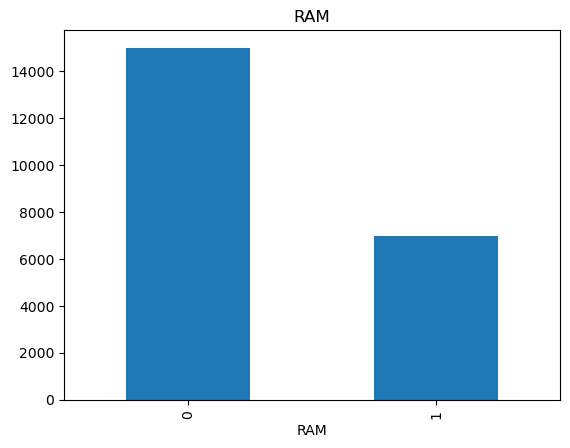

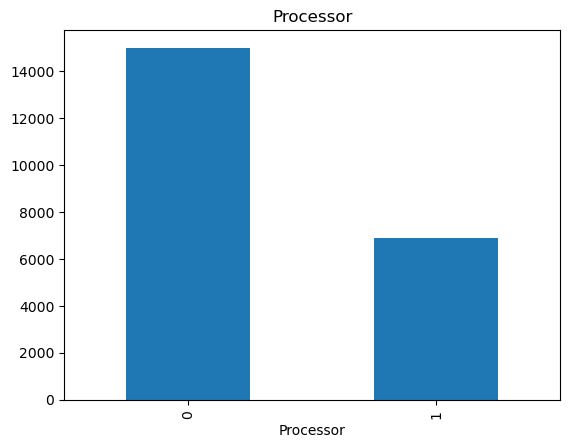

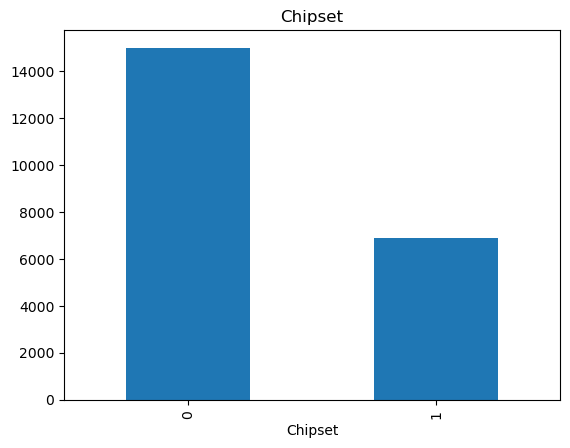

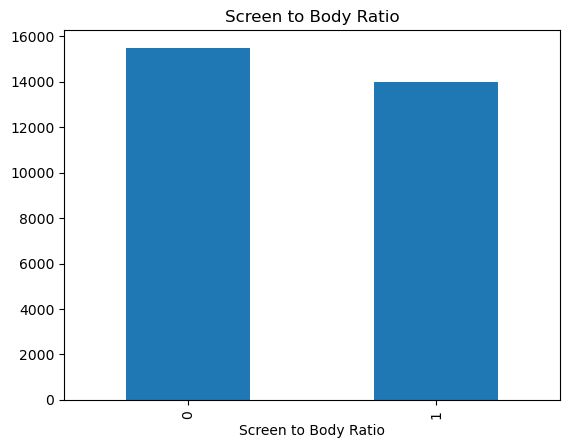

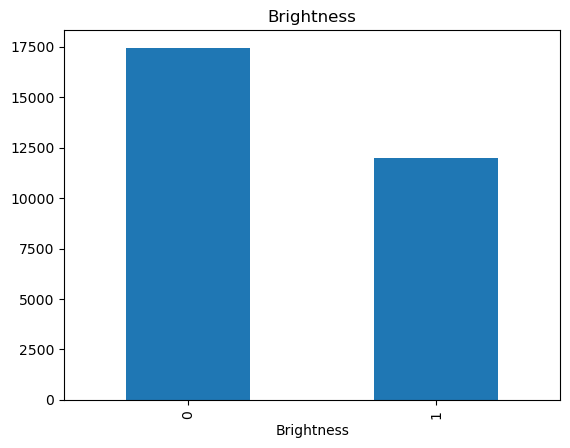

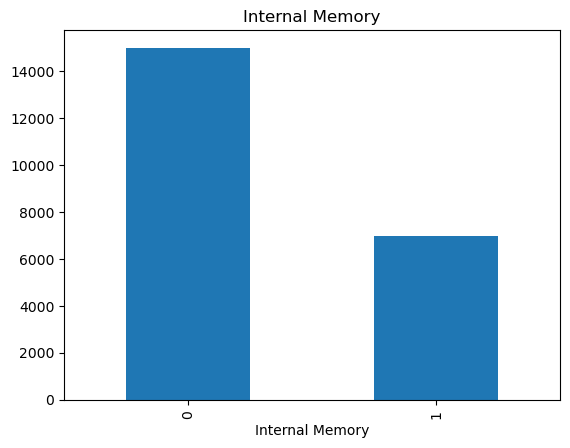

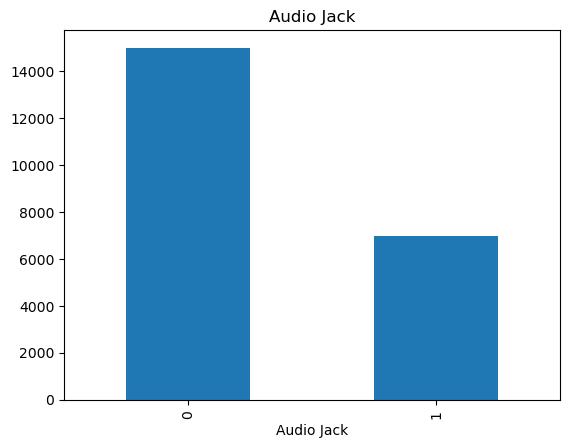

In [61]:
eda = data.copy()
import matplotlib.pyplot as plt
for feature in features_with_na:
    
    eda[feature] = np.where(eda[feature].isnull(), 1, 0)
    
    eda.groupby(feature)['Price'].median().plot.bar()
    plt.title(feature)
    plt.show()

## **Numerical Features**

In [62]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

data[numerical_features].head()

Number of numerical variables:  12


,RAM,Battery,Rear Camera,Front Camera,Display,Launch Date,Fabrication,Pixel Density,Refresh Rate,Internal Memory,SIM Slot(s),Price
0,8.0,5000,108,16.0,6.72,2023,6,392,120,128,2,20000
1,6.0,5000,108,16.0,6.70,2022,6,394,120,128,2,24800
2,4.0,5000,50,8.0,6.74,2023,12,390,90,64,2,9000
3,8.0,5000,50,16.0,6.74,2023,4,451,120,128,2,40000
4,8.0,5000,64,16.0,6.67,2023,4,395,120,256,2,30000


## **Temporal Variable**

Text(0.5, 1.0, 'Price vs Launch Year')

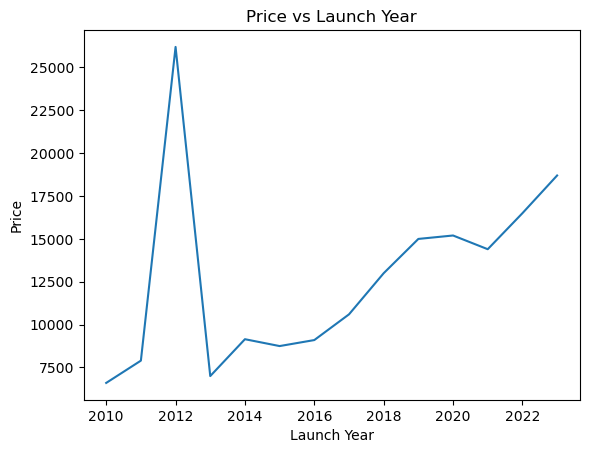

In [63]:
data.groupby('Launch Date')['Price'].median().plot()
plt.xlabel('Launch Year')
plt.ylabel('Price')
plt.title("Price vs Launch Year")

## **Continous variable and Discrete Variables**

In [64]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature !='Launch Date']
print(f"Discrete Variables Count: {len(discrete_feature)}")

Discrete Variables Count: 7


In [65]:
discrete_feature

['RAM',
 'Rear Camera',
 'Front Camera',
 'Fabrication',
 'Refresh Rate',
 'Internal Memory',
 'SIM Slot(s)']

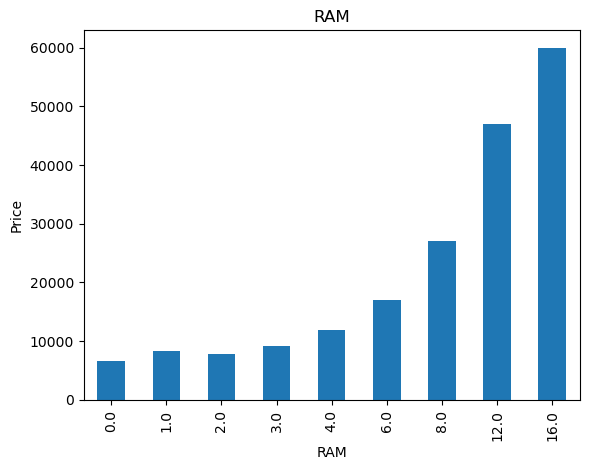

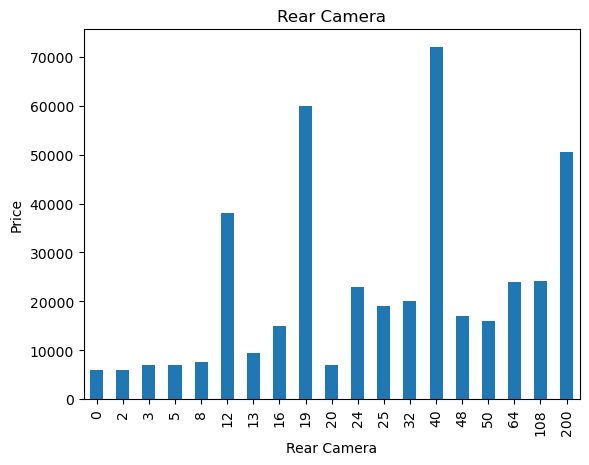

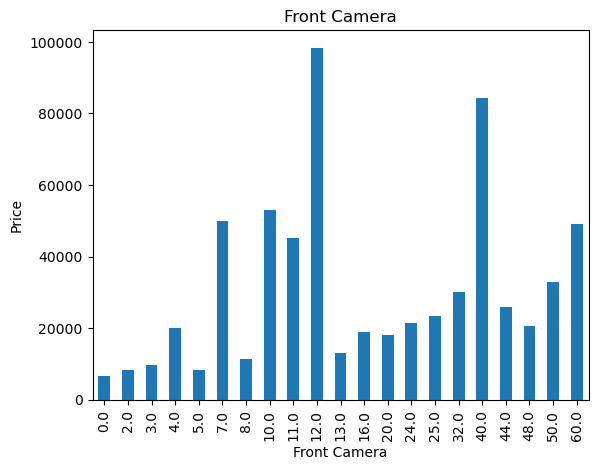

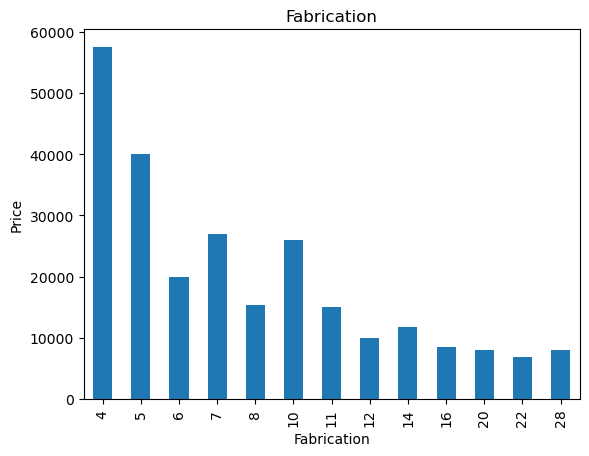

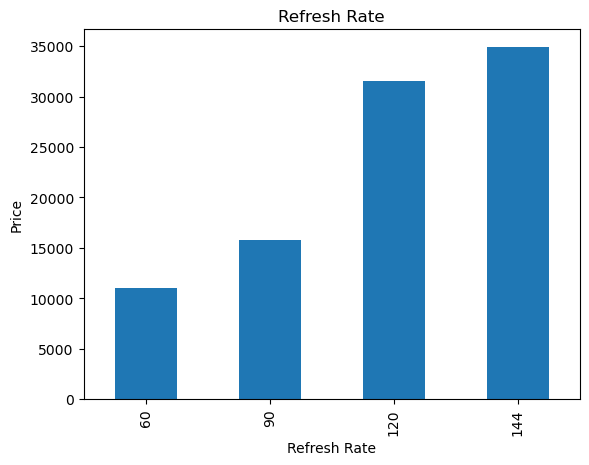

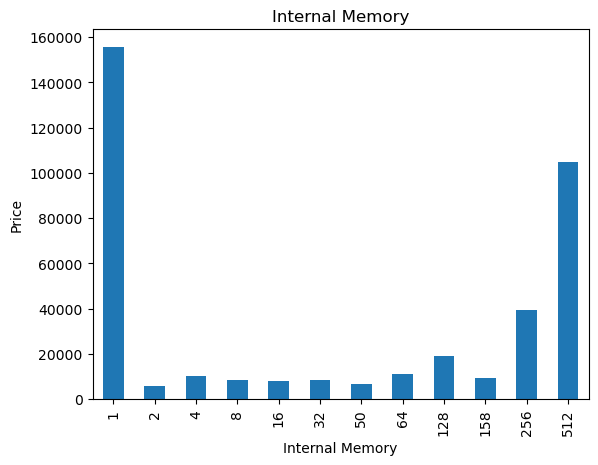

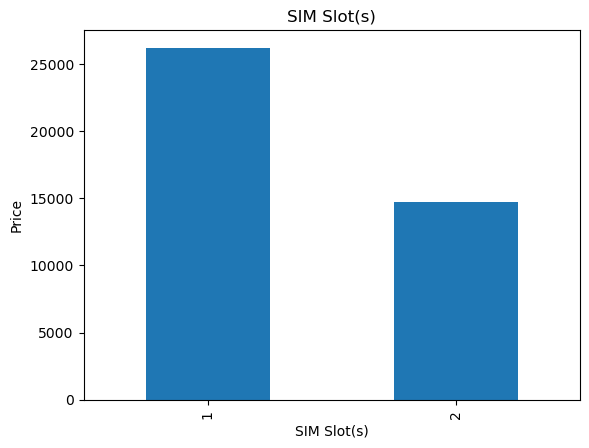

In [66]:
for feature in discrete_feature:
    eda=data.copy()
    eda.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [67]:
continuous_feature=[feature for feature in numerical_features if feature != 'Launch Date']
print(f"Continuous feature Count {len(continuous_feature)}")
continuous_feature

Continuous feature Count 11


['RAM',
 'Battery',
 'Rear Camera',
 'Front Camera',
 'Display',
 'Fabrication',
 'Pixel Density',
 'Refresh Rate',
 'Internal Memory',
 'SIM Slot(s)',
 'Price']

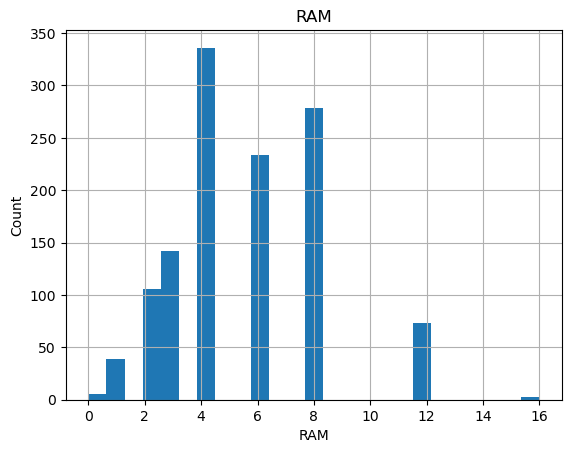

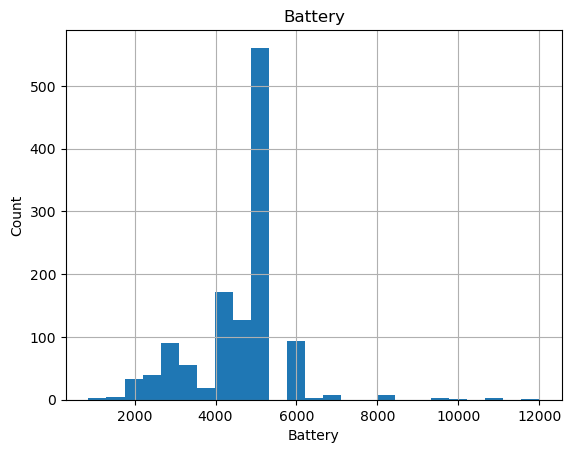

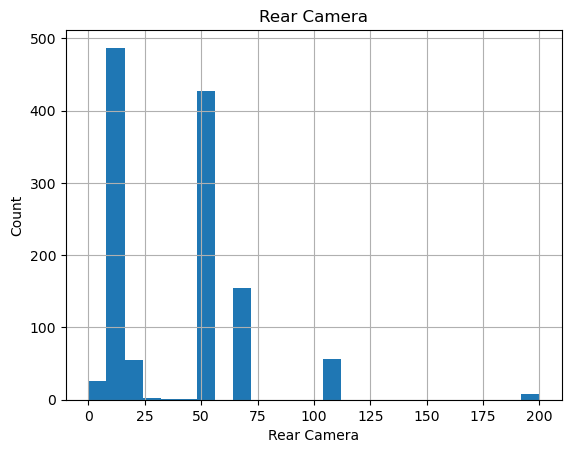

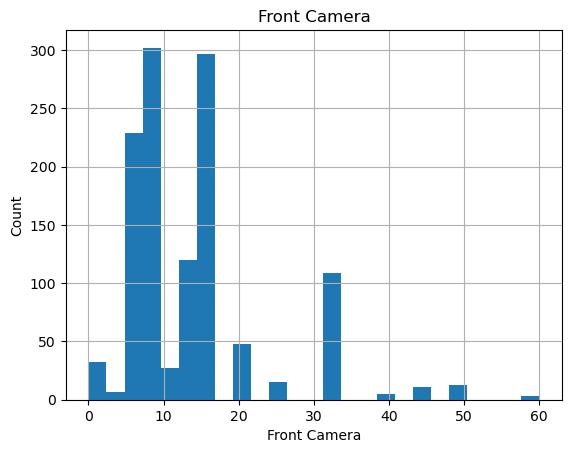

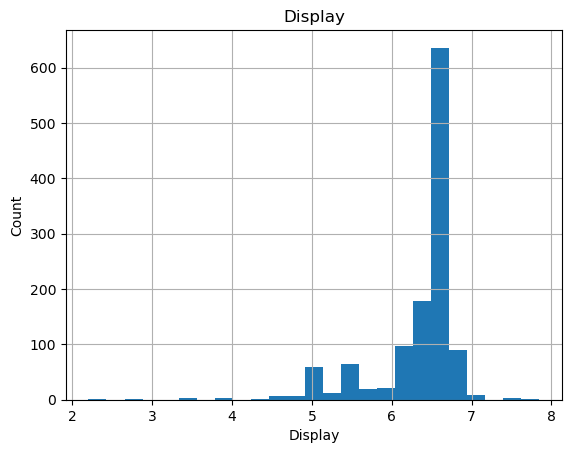

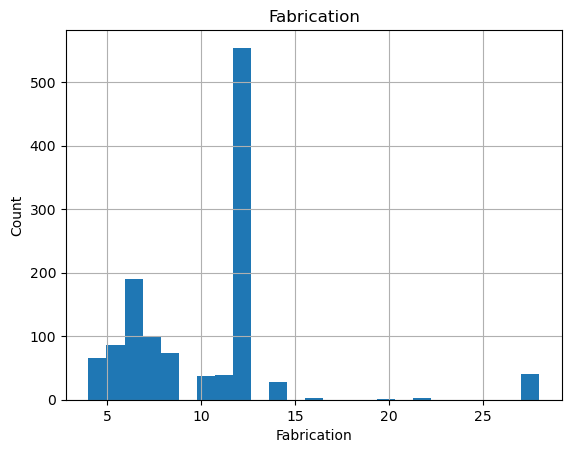

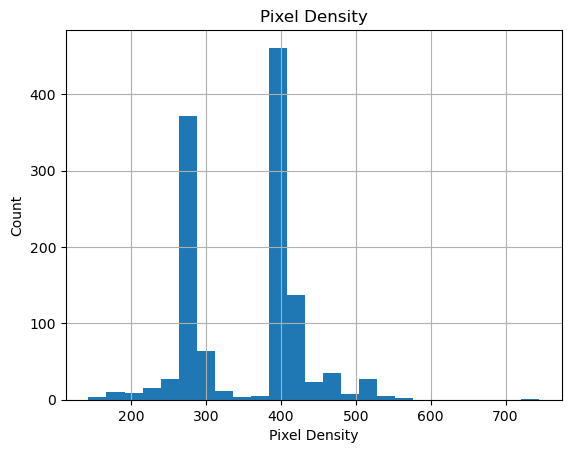

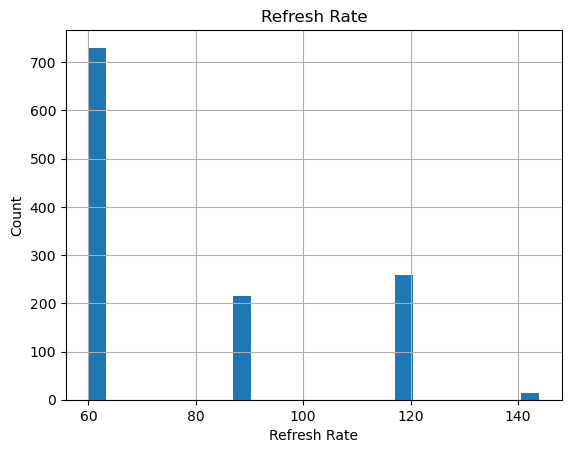

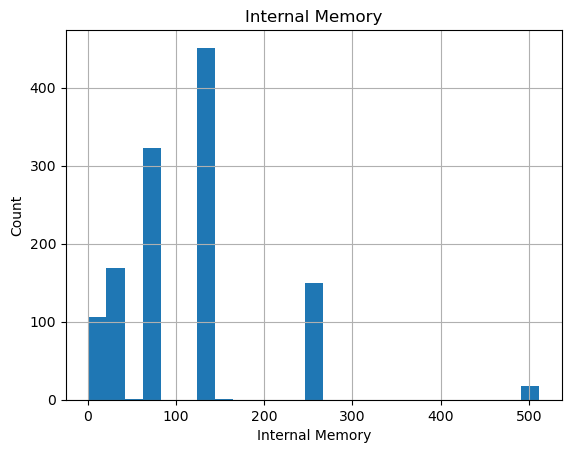

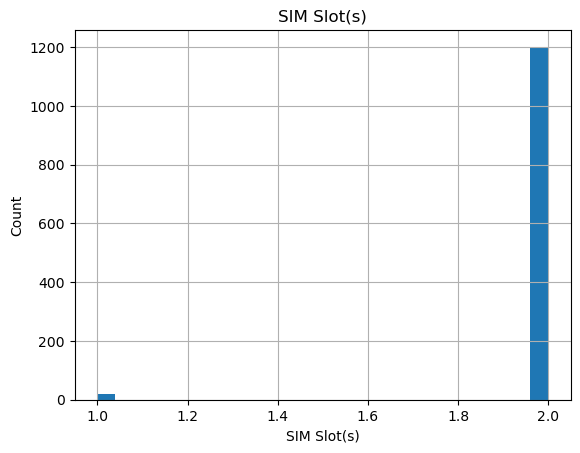

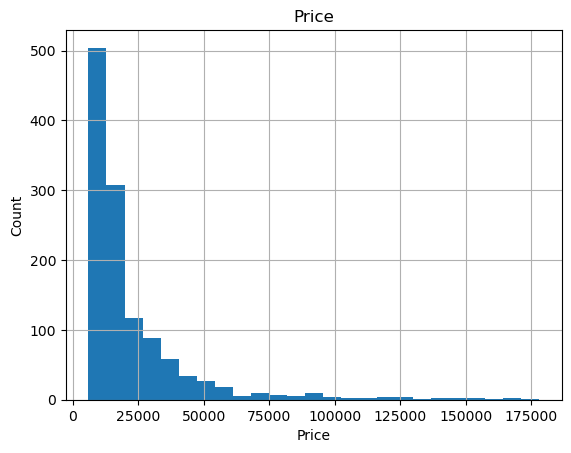

In [68]:
for feature in continuous_feature:
    eda=data.copy()
    eda[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

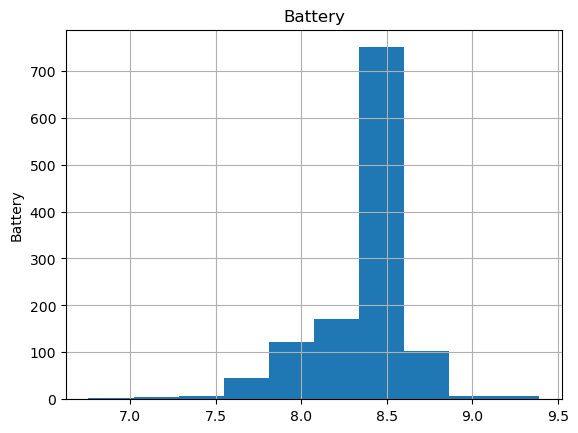

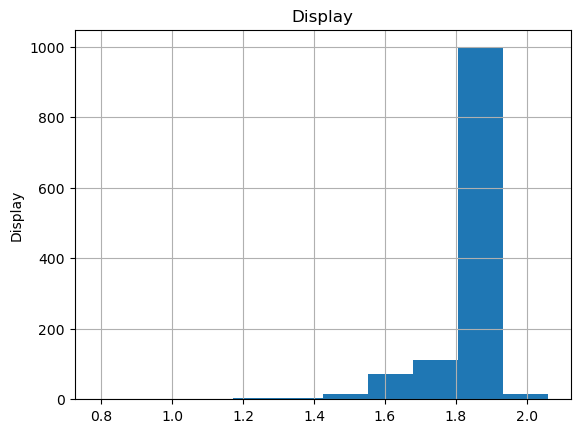

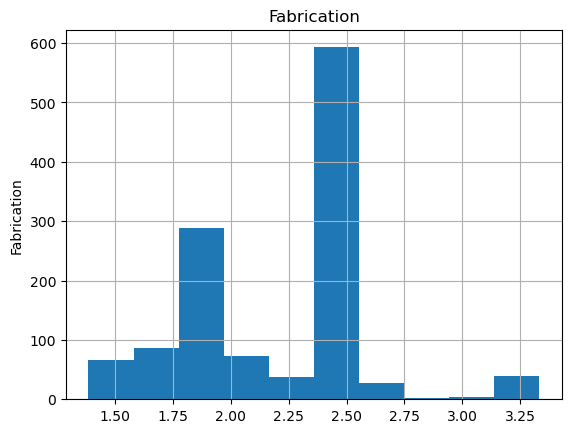

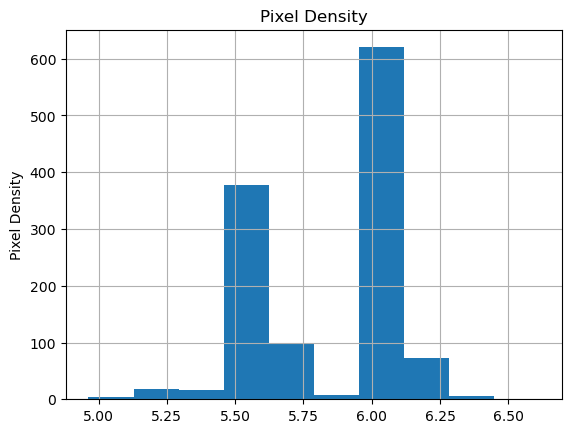

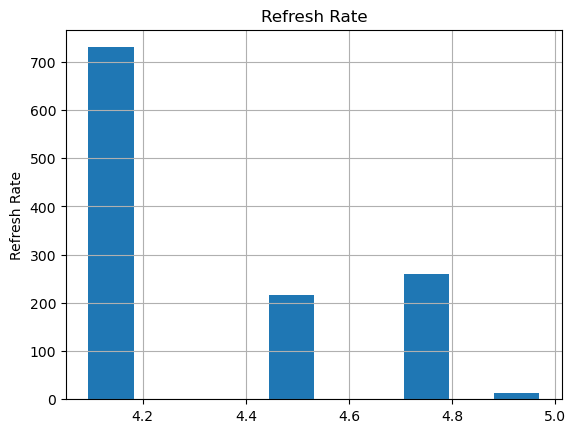

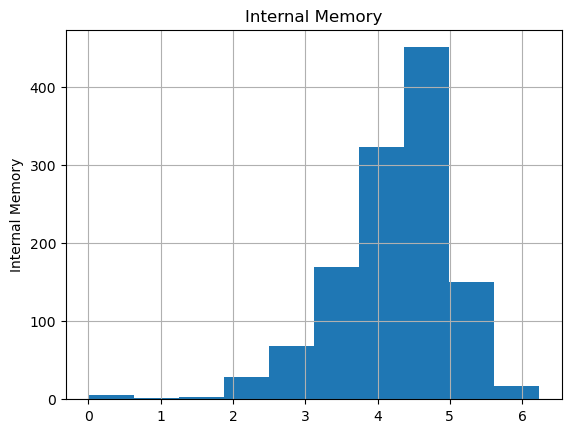

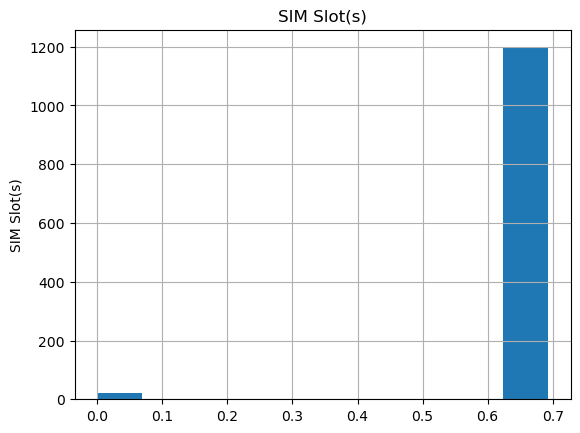

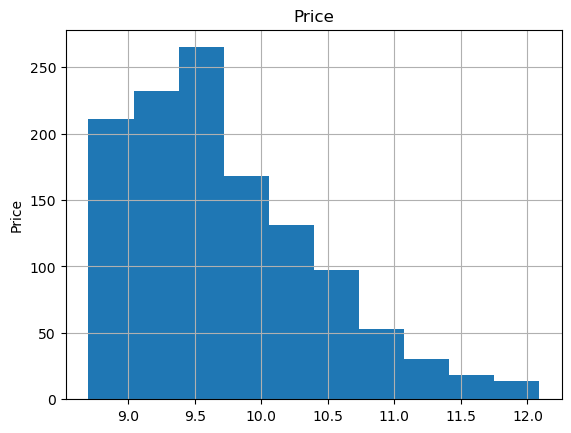

In [69]:
for feature in continuous_feature:
    eda=data.copy()
    if 0 in eda[feature].unique():
        pass
    else:
        eda[feature]=np.log(eda[feature])
        eda.hist(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## **Categorical Features**

In [70]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['Brand',
 'Name',
 'Processor',
 'Operating System',
 'Chipset',
 'Graphics',
 'Display Type',
 'Screen to Body Ratio',
 'Brightness',
 'Capacity',
 'Quick Charging',
 'USB Type-C',
 'Expandable Memory',
 'Wi-Fi',
 'Bluetooth',
 'GPS',
 'Audio Jack',
 'Fingerprint Sensor']

In [71]:
data[categorical_features].head()

,Brand,Name,Processor,Operating System,Chipset,Graphics,Display Type,Screen to Body Ratio,Brightness,Capacity,Quick Charging,USB Type-C,Expandable Memory,Wi-Fi,Bluetooth,GPS,Audio Jack,Fingerprint Sensor
0,OnePlus,OnePlus Nord CE 3 Lite 5G,Qualcomm,Android,Qualcomm Snapdragon 695,Adreno,LCD,91.40 %,680 nits,5000 mAh,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,realme,realme 10 Pro Plus 5G,MediaTek,Android,MediaTek Dimensity 1080 MT6877V,Mali,AMOLED,93.65 %,800 nits,5000 mAh,Yes,Yes,No,Yes,Yes,Yes,No,Yes
2,realme,realme Narzo N53,Unisoc,Android,Unisoc T612,Mali,LCD,90.3 %,NaN,5000 mAh,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,OnePlus,OnePlus 11R,Qualcomm,Android,Qualcomm Snapdragon 8 Plus Gen 1,Adreno,AMOLED,NaN,1450 nits,5000 mAh,Yes,Yes,No,Yes,Yes,Yes,No,Yes
4,POCO,POCO F5,Qualcomm,Android,Qualcomm Snapdragon 7 Plus Gen 2,Adreno,AMOLED,NaN,1000 nits,5000 mAh,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes


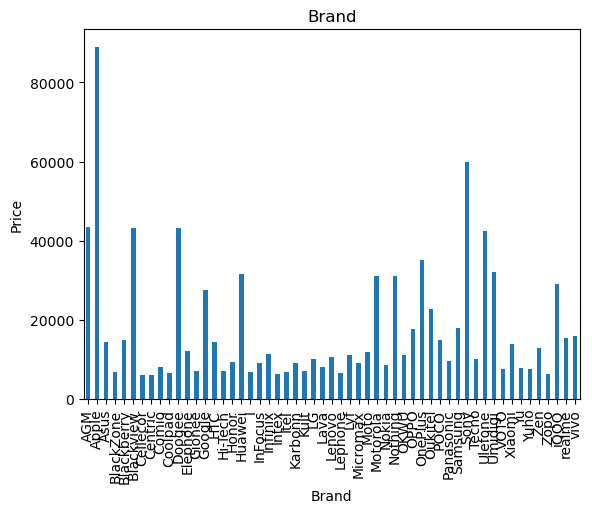

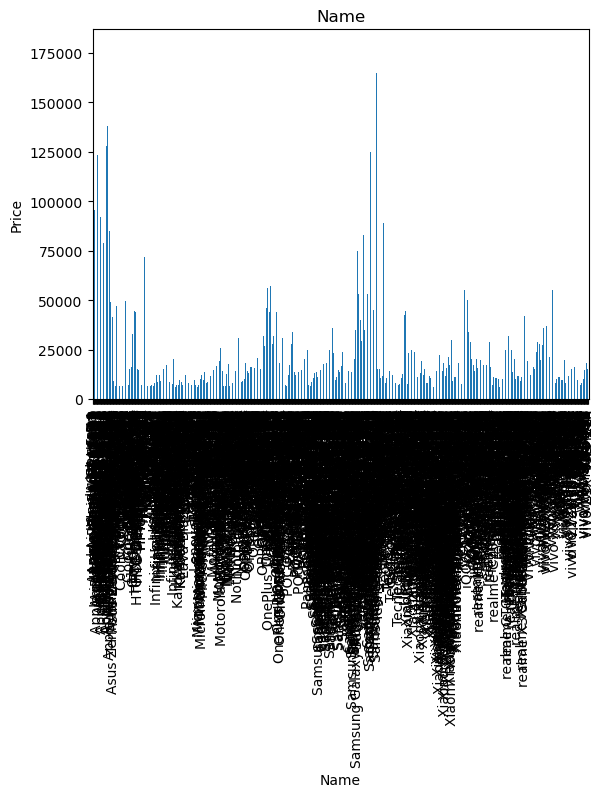

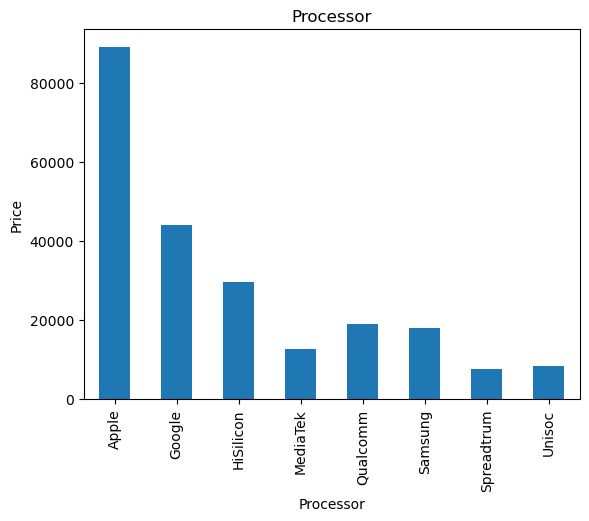

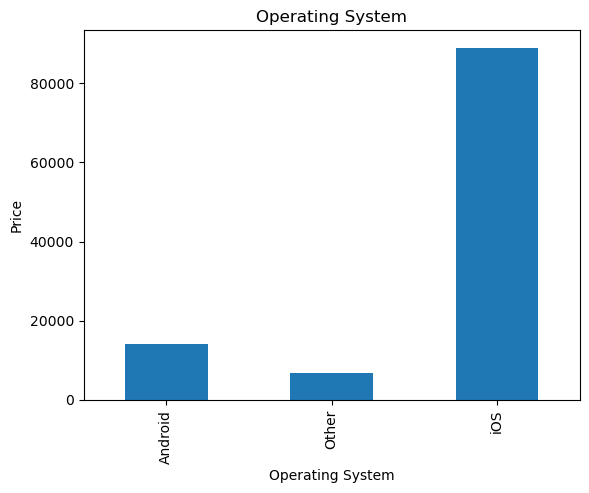

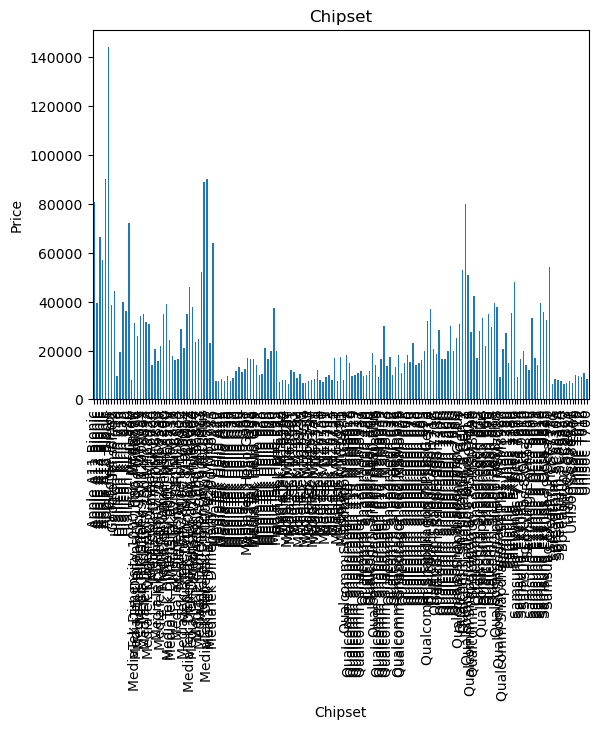

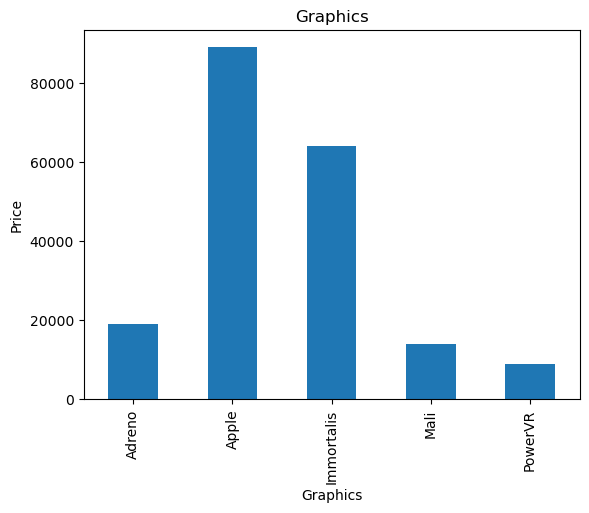

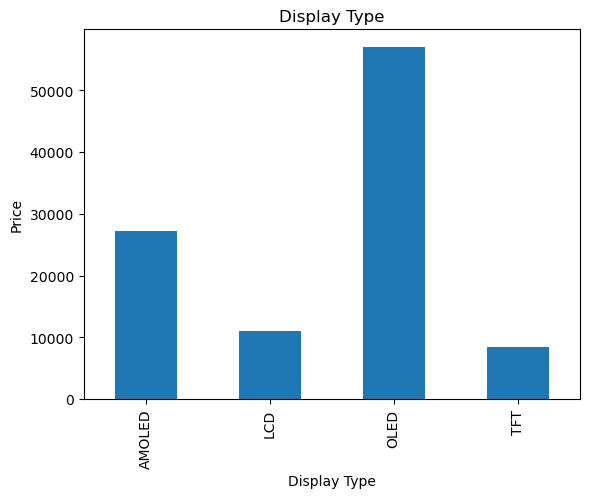

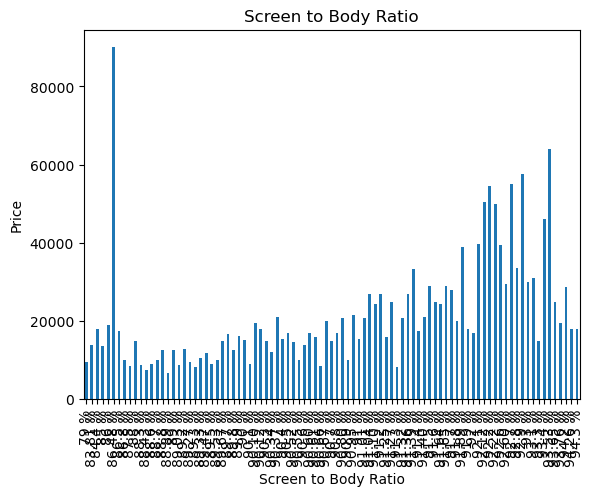

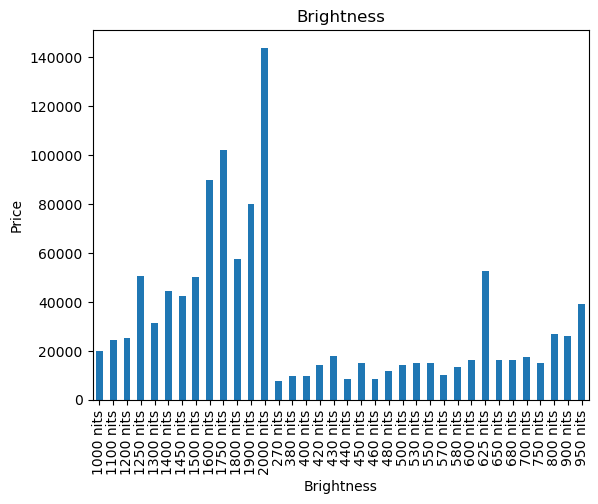

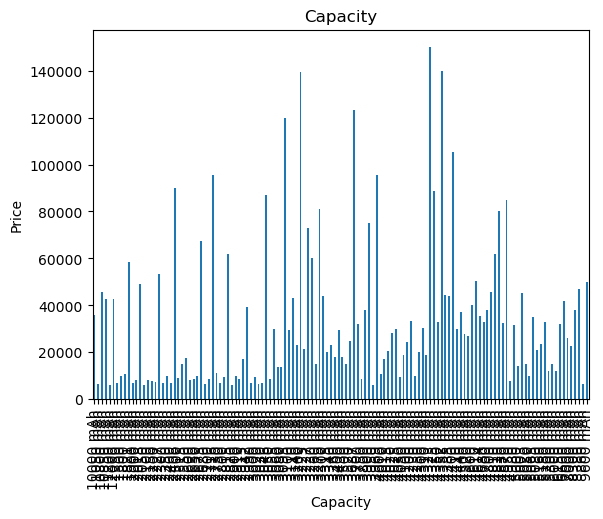

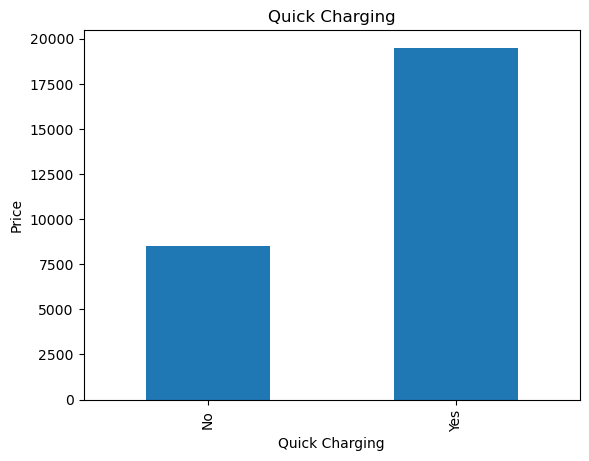

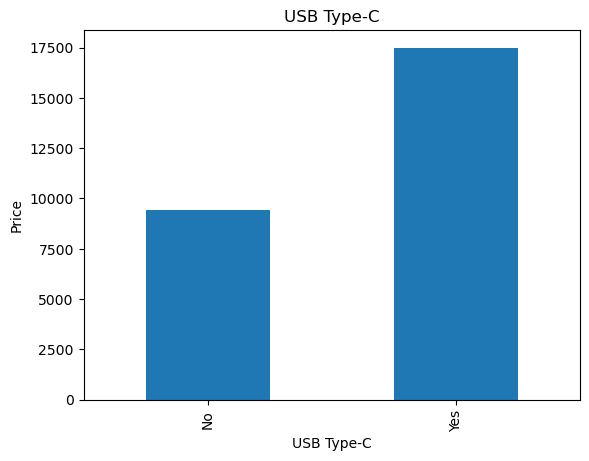

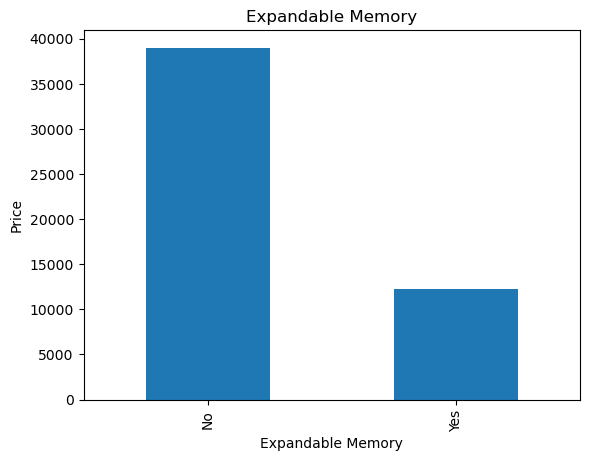

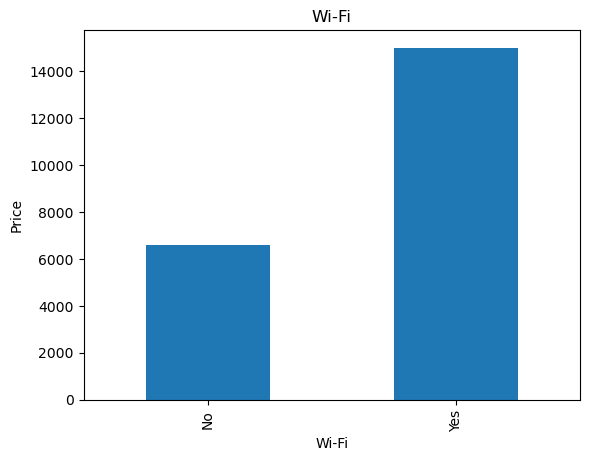

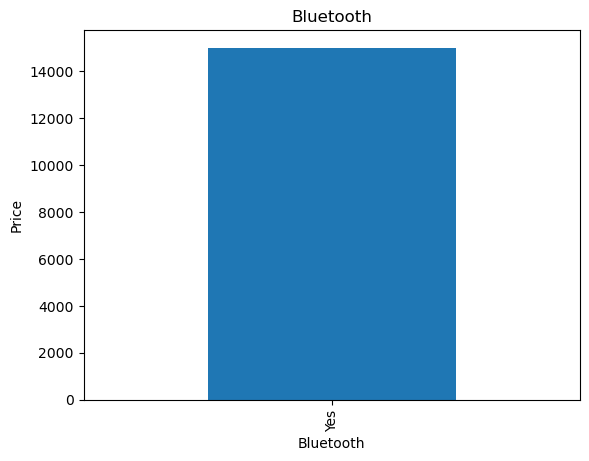

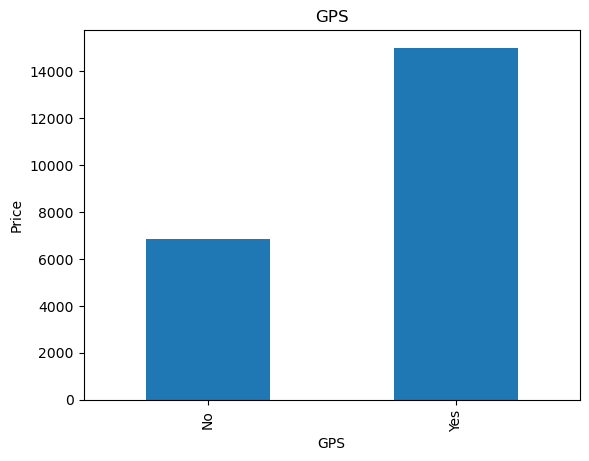

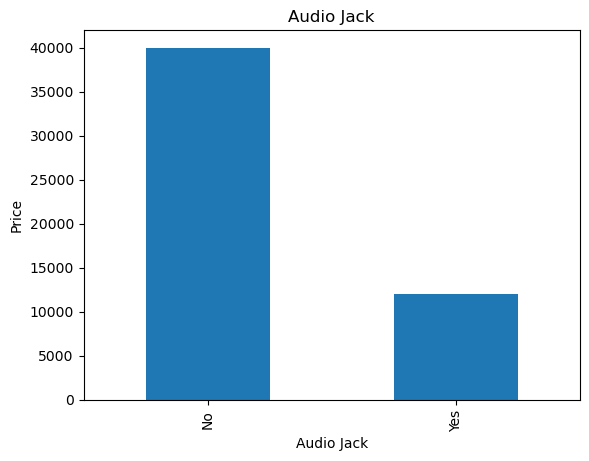

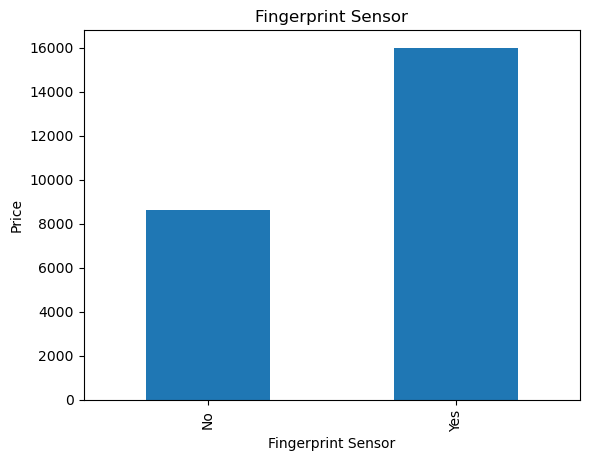

In [72]:
for feature in categorical_features:
    eda=data.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

/tmp/ipykernel_32/480550420.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfpd.corr(), annot=True)


<Axes: >

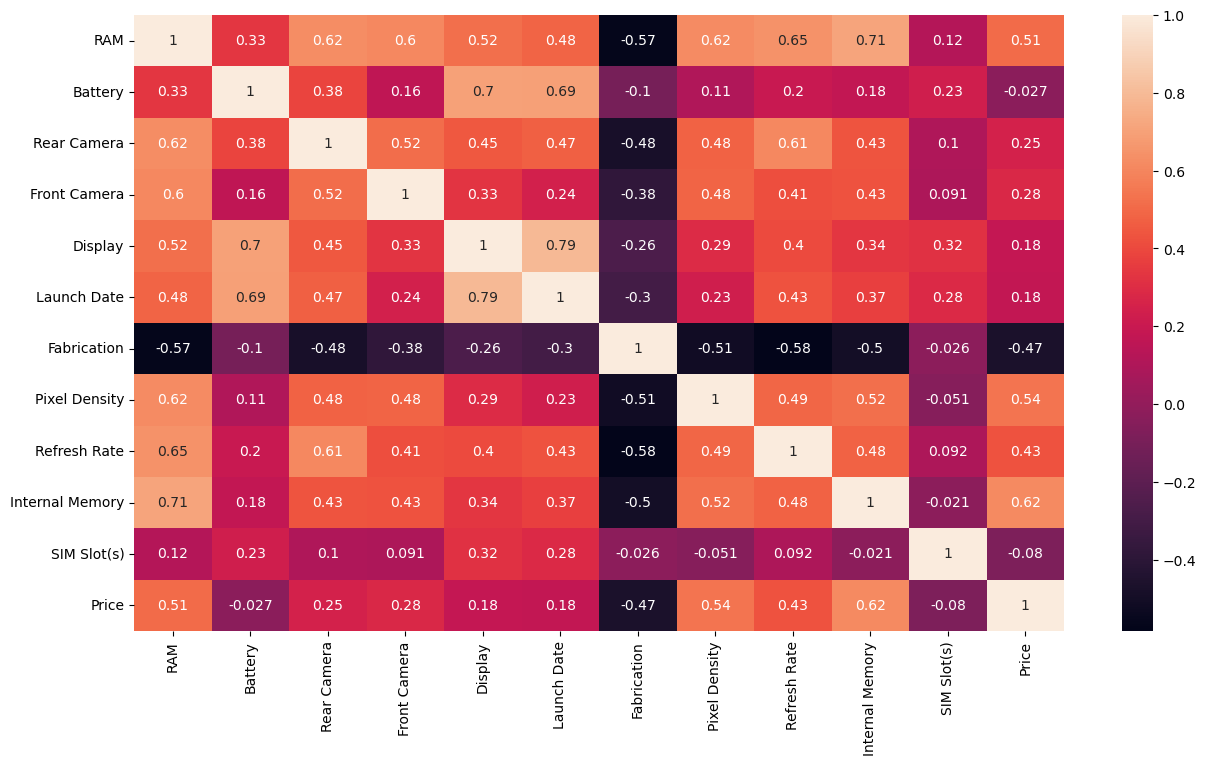

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(dfpd.corr(), annot=True)

/tmp/ipykernel_32/2916719075.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfpd[dfpd.skew().idxmax()].plot(kind = 'density')


<Axes: ylabel='Density'>

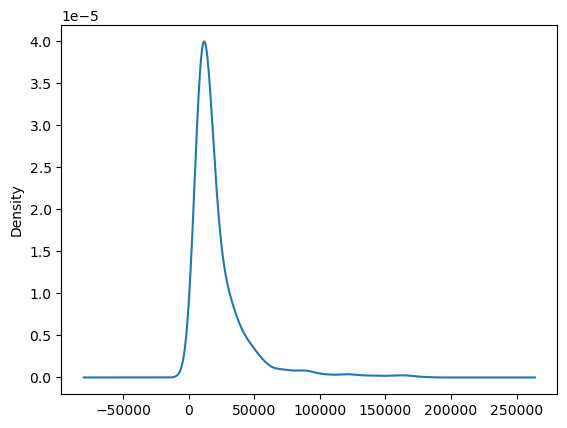

In [74]:
dfpd[dfpd.skew().idxmax()].plot(kind = 'density')

/tmp/ipykernel_32/3562817841.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfpd[dfpd.skew().idxmin()].plot(kind = 'density')


<Axes: ylabel='Density'>

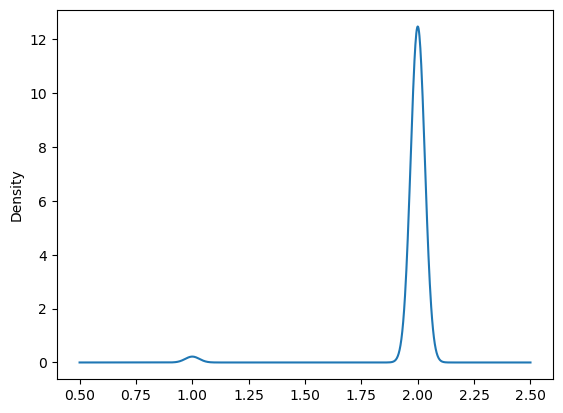

In [75]:
dfpd[dfpd.skew().idxmin()].plot(kind = 'density')

In [76]:
dfpd.head()

,Brand,Name,RAM,Processor,Battery,Rear Camera,Front Camera,Display,Launch Date,Operating System,...,USB Type-C,Internal Memory,Expandable Memory,Wi-Fi,Bluetooth,GPS,Audio Jack,SIM Slot(s),Fingerprint Sensor,Price
0,OnePlus,OnePlus Nord CE 3 Lite 5G,8.0,Qualcomm,5000,108,16.0,6.72,2023,Android,...,Yes,128,Yes,Yes,Yes,Yes,Yes,2,Yes,20000
1,realme,realme 10 Pro Plus 5G,6.0,MediaTek,5000,108,16.0,6.70,2022,Android,...,Yes,128,No,Yes,Yes,Yes,No,2,Yes,24800
2,realme,realme Narzo N53,4.0,Unisoc,5000,50,8.0,6.74,2023,Android,...,Yes,64,Yes,Yes,Yes,Yes,Yes,2,Yes,9000
3,OnePlus,OnePlus 11R,8.0,Qualcomm,5000,50,16.0,6.74,2023,Android,...,Yes,128,No,Yes,Yes,Yes,No,2,Yes,40000
4,POCO,POCO F5,8.0,Qualcomm,5000,64,16.0,6.67,2023,Android,...,Yes,256,No,Yes,Yes,Yes,Yes,2,Yes,30000


## Missing Values

In [77]:
dfpd.drop('Name', axis=1, inplace=True)
dfpd.dropna(subset=['RAM'], inplace=True)
dfpd['Processor'] = dfpd['Processor'].fillna('other')
dfpd.dropna(subset=['Battery'], inplace=True)
dfpd.dropna(subset=['Front Camera'], inplace=True)
dfpd['Operating System'] = dfpd['Operating System'].fillna('other')
dfpd.drop('Chipset', axis=1, inplace=True)
dfpd.drop('Screen to Body Ratio', axis=1, inplace=True)
dfpd.drop('Brightness', axis=1, inplace=True)
dfpd.drop('Capacity', axis=1, inplace=True)
dfpd.dropna(subset=["Wi-Fi","GPS", "Audio Jack"], inplace=True)
dfpd.dropna(subset=['Display Type'], inplace=True)
dfpd.drop('Bluetooth', axis=1, inplace=True)
dfpd.dropna(subset=['Price'], inplace=True)
dfpd.shape

(1210, 24)

In [78]:
dfpd.to_csv('mobile-data-cleaned.csv')

# Label Encoding

In [79]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

dfpd['Brand']= label_encoder.fit_transform(dfpd['Brand'])
dfpd['Processor']= label_encoder.fit_transform(dfpd['Processor'])
dfpd['Operating System']= label_encoder.fit_transform(dfpd['Operating System'])
dfpd['Graphics']= label_encoder.fit_transform(dfpd['Graphics'])
dfpd['Display Type']= label_encoder.fit_transform(dfpd['Display Type'])
dfpd['Quick Charging']= label_encoder.fit_transform(dfpd['Quick Charging'])
dfpd['USB Type-C']= label_encoder.fit_transform(dfpd['USB Type-C'])
dfpd['Expandable Memory']= label_encoder.fit_transform(dfpd['Expandable Memory'])
dfpd['Audio Jack']= label_encoder.fit_transform(dfpd['Audio Jack'])
dfpd['Fingerprint Sensor']= label_encoder.fit_transform(dfpd['Fingerprint Sensor'])
dfpd['Wi-Fi']= label_encoder.fit_transform(dfpd['Wi-Fi'])
dfpd['GPS']= label_encoder.fit_transform(dfpd['GPS'])

In [80]:
dfpd.shape

(1210, 24)

## Removing Outliers 

In [81]:
duplicate_rows = dfpd[dfpd.duplicated()]
duplicate_rows
dfpd.drop_duplicates(inplace=True)
dfpd.shape

(1135, 24)

In [82]:
dfpd = dfpd[dfpd['Brand'] != 'Apple']
dfpd.shape

(1135, 24)

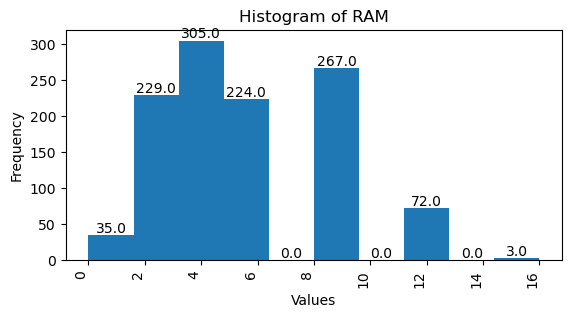

(1135, 24)

In [83]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(dfpd['RAM'], bins=10)  # Replace 'column_name' with the actual column you want to plot

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of RAM')

# Adjust x-axis tick spacing and rotation
plt.xticks(rotation=90, ha='right')

# Add more horizontal space between labels
plt.subplots_adjust(bottom=0.4)
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()
dfpd.shape


In [84]:
dfpd = dfpd[dfpd['RAM'].astype(float) >= 1]

dfpd.shape

(1133, 24)

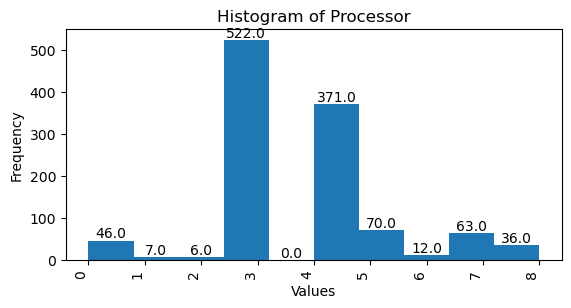

(1133, 24)

In [85]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(dfpd['Processor'], bins=10)  # Replace 'column_name' with the actual column you want to plot

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Processor')

# Adjust x-axis tick spacing and rotation
plt.xticks(rotation=90, ha='right')

# Add more horizontal space between labels
plt.subplots_adjust(bottom=0.4)
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()
dfpd.shape

In [86]:
dfpd = dfpd[dfpd['Processor'].astype(float) >= 1]

dfpd.shape

(1087, 24)

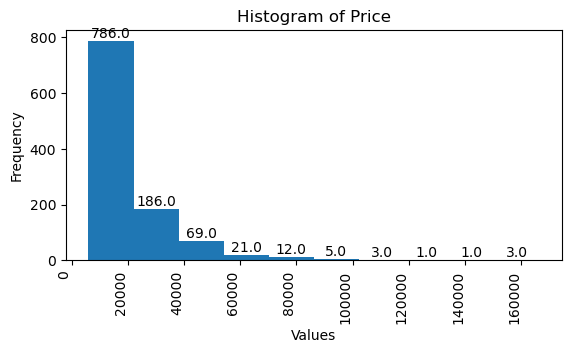

(1087, 24)

In [87]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(dfpd['Price'], bins=10)  # Replace 'column_name' with the actual column you want to plot

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

# Adjust x-axis tick spacing and rotation
plt.xticks(rotation=90, ha='right')

# Add more horizontal space between labels
plt.subplots_adjust(bottom=0.4)
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()
dfpd.shape

In [88]:
dfpd = dfpd[dfpd['Price'].astype(float) <=60000]

dfpd.shape

(1056, 24)

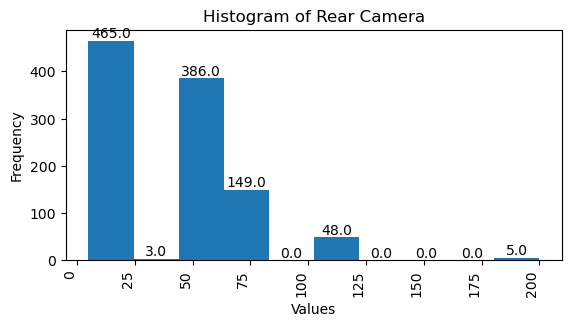

(1056, 24)

In [89]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(dfpd['Rear Camera'], bins=10)  # Replace 'column_name' with the actual column you want to plot

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Rear Camera')

# Adjust x-axis tick spacing and rotation
plt.xticks(rotation=90, ha='right')

# Add more horizontal space between labels
plt.subplots_adjust(bottom=0.4)
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()
dfpd.shape

In [90]:
dfpd = dfpd[dfpd['Rear Camera'].astype(int) <=125]

dfpd.shape

(1051, 24)

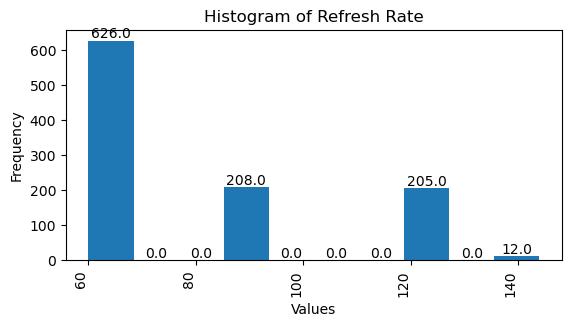

(1051, 24)

In [91]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(dfpd['Refresh Rate'], bins=10)  # Replace 'column_name' with the actual column you want to plot

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Refresh Rate')

# Adjust x-axis tick spacing and rotation
plt.xticks(rotation=90, ha='right')

# Add more horizontal space between labels
plt.subplots_adjust(bottom=0.4)
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()
dfpd.shape

In [92]:
dfpd = dfpd[dfpd['Refresh Rate'] < 140]
dfpd.shape

(1039, 24)

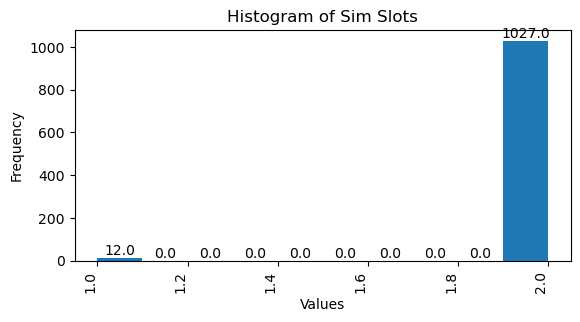

(1039, 24)

In [93]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(dfpd['SIM Slot(s)'], bins=10)  # Replace 'column_name' with the actual column you want to plot

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Sim Slots')

# Adjust x-axis tick spacing and rotation
plt.xticks(rotation=90, ha='right')

# Add more horizontal space between labels
plt.subplots_adjust(bottom=0.4)
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()
dfpd.shape

In [94]:
dfpd.drop('SIM Slot(s)', axis=1, inplace=True)


In [95]:
dfpd.shape

(1039, 23)

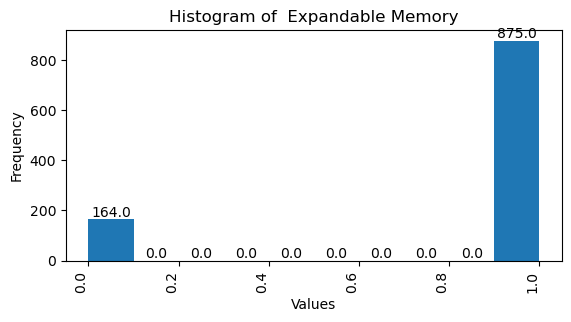

(1039, 23)

In [96]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(dfpd['Expandable Memory'], bins=10)  # Replace 'column_name' with the actual column you want to plot

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of  Expandable Memory')

# Adjust x-axis tick spacing and rotation
plt.xticks(rotation=90, ha='right')

# Add more horizontal space between labels
plt.subplots_adjust(bottom=0.4)
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()
dfpd.shape

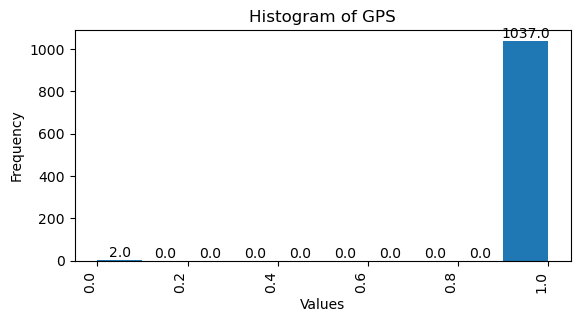

(1039, 23)

In [97]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(dfpd['GPS'], bins=10)  # Replace 'column_name' with the actual column you want to plot

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of GPS')

# Adjust x-axis tick spacing and rotation
plt.xticks(rotation=90, ha='right')
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Add more horizontal space between labels
plt.subplots_adjust(bottom=0.4)

# Show the plot
plt.show()
dfpd.shape

In [98]:
dfpd.drop('GPS', axis=1, inplace=True)
dfpd.shape

(1039, 22)

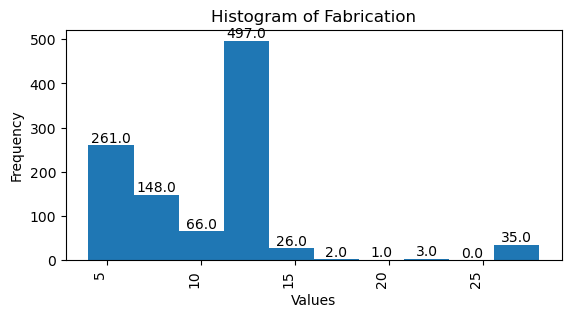

(1039, 22)

In [99]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(dfpd['Fabrication'], bins=10)  # Replace 'column_name' with the actual column you want to plot

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Fabrication')

# Adjust x-axis tick spacing and rotation
plt.xticks(rotation=90, ha='right')

# Add more horizontal space between labels
plt.subplots_adjust(bottom=0.4)
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()
dfpd.shape

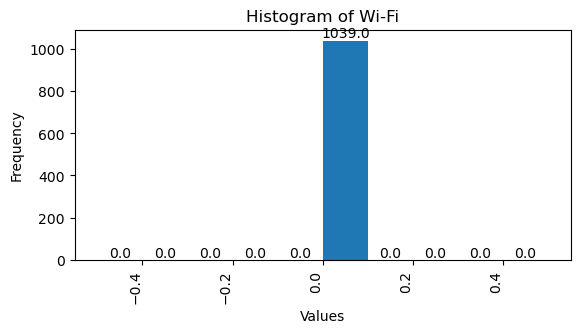

(1039, 22)

In [100]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(dfpd['Wi-Fi'], bins=10)  # Replace 'column_name' with the actual column you want to plot

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Wi-Fi')

# Adjust x-axis tick spacing and rotation
plt.xticks(rotation=90, ha='right')
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Add more horizontal space between labels
plt.subplots_adjust(bottom=0.4)

# Show the plot
plt.show()
dfpd.shape

In [101]:
dfpd.drop('Wi-Fi',axis=1,inplace=True)
dfpd.shape

(1039, 21)

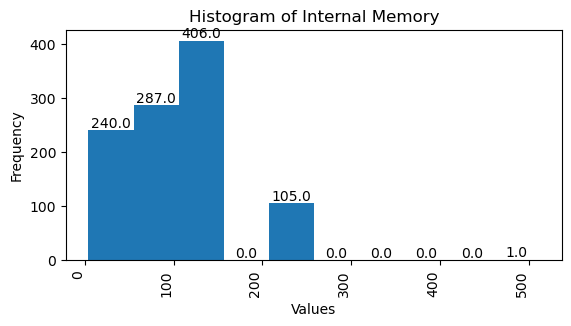

(1039, 21)

In [102]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(dfpd['Internal Memory'], bins=10)  # Replace 'column_name' with the actual column you want to plot

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Internal Memory')

# Adjust x-axis tick spacing and rotation
plt.xticks(rotation=90, ha='right')
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Add more horizontal space between labels
plt.subplots_adjust(bottom=0.4)

# Show the plot
plt.show()
dfpd.shape

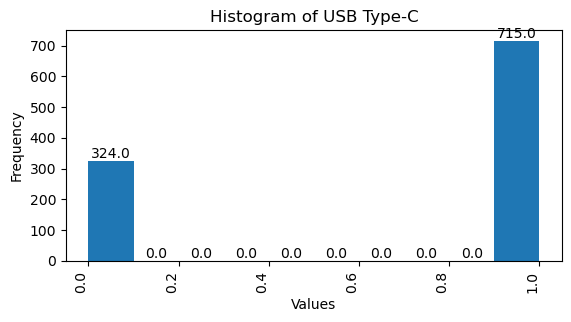

(1039, 21)

In [103]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(dfpd['USB Type-C'], bins=10)  # Replace 'column_name' with the actual column you want to plot

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of USB Type-C')

# Adjust x-axis tick spacing and rotation
plt.xticks(rotation=90, ha='right')

# Add more horizontal space between labels
plt.subplots_adjust(bottom=0.4)
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()
dfpd.shape

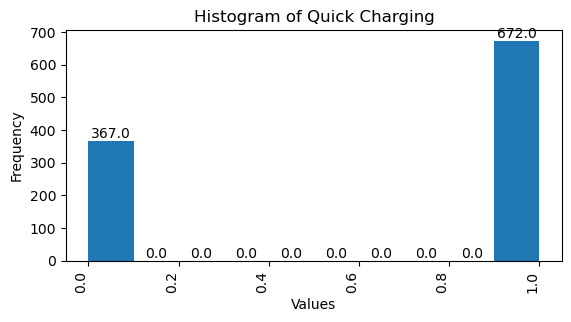

(1039, 21)

In [104]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(dfpd['Quick Charging'], bins=10)  # Replace 'column_name' with the actual column you want to plot

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Quick Charging')

# Adjust x-axis tick spacing and rotation
plt.xticks(rotation=90, ha='right')

# Add more horizontal space between labels
plt.subplots_adjust(bottom=0.4)
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()
dfpd.shape

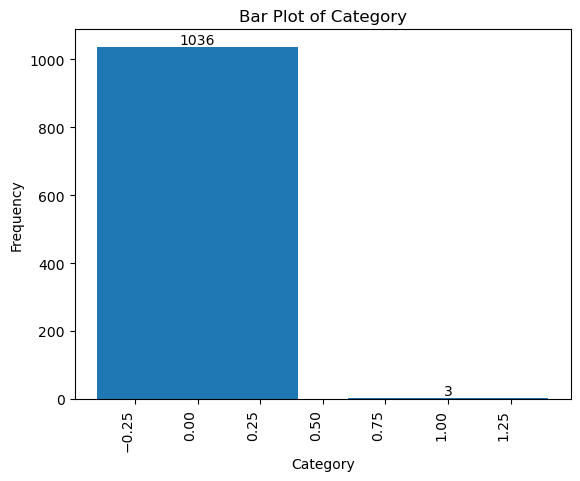

In [105]:
import matplotlib.pyplot as plt

# Count the frequency of each categorical value
value_counts = dfpd['Operating System'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar Plot of Category')

# Adjust x-axis tick spacing and rotation if needed
plt.xticks(rotation=90, ha='right')
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height()}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()


In [106]:
dfpd.isnull().sum()

Brand                 0
RAM                   0
Processor             0
Battery               0
Rear Camera           0
Front Camera          0
Display               0
Launch Date           0
Operating System      0
Fabrication           0
Graphics              0
Display Type          0
Pixel Density         0
Refresh Rate          0
Quick Charging        0
USB Type-C            0
Internal Memory       0
Expandable Memory     0
Audio Jack            0
Fingerprint Sensor    0
Price                 0
dtype: int64

In [107]:
dfpd_filtered = dfpd.to_csv("mobile-data-no-outliers.csv")

# Feature Selection

In [108]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
X = dfpd.drop(['Price'], axis=1)
y = dfpd['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
                     ('scaler',MinMaxScaler()),
                     ('model',Lasso())
])
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_train,y_train)

# Get the coefficients of the Lasso model
coef = search.best_estimator_.named_steps['model'].coef_

# Sort the coefficients in descending order
sorted_coef = np.argsort(coef)[::-1]

# Select the top 10 features
top_10_features = sorted_coef[:10]

# Print the top 10 features
print(top_10_features)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ..........model__alpha=0.1;, score=-29001641.658 total time=   0.0s
[CV 2/5] END ..........model__alpha=0.1;, score=-44554951.798 total time=   0.0s
[CV 3/5] END ..........model__alpha=0.1;, score=-22265462.819 total time=   0.0s
[CV 4/5] END ..........model__alpha=0.1;, score=-19943066.116 total time=   0.0s
[CV 5/5] END ..........model__alpha=0.1;, score=-29061122.031 total time=   0.0s
[CV 1/5] END ..........model__alpha=0.2;, score=-29003793.963 total time=   0.0s
[CV 2/5] END ..........model__alpha=0.2;, score=-44555231.697 total time=   0.0s
[CV 3/5] END ..........model__alpha=0.2;, score=-22261649.405 total time=   0.0s
[CV 4/5] END ..........model__alpha=0.2;, score=-19944305.683 total time=   0.0s
[CV 5/5] END ..........model__alpha=0.2;, score=-29055950.378 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-29005742.818 total time=   0.0s
[CV 2/5] END model__alpha=0.3000000000000

In [109]:
search.best_params_

{'model__alpha': 6.4}

In [110]:
features = X.columns
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
selected_features = np.array(features)[importance > 0]
dataset = pd.concat([dfpd[selected_features], dfpd['Price']], axis=1)

In [111]:
dataset.dropna(inplace=True)


# Data Normalization

In [112]:
# from sklearn import preprocessing

# scaler = preprocessing.MinMaxScaler()
# dfpd_scaled = scaler.fit_transform(dataset)
# dfpd_scaled = pd.DataFrame(dfpd_scaled, columns=dataset.columns)
# dfpd_scaled.to_csv('mobile-data-scaled.csv', index=False)

# Model Selection

Best Random State: 72
Best R2 Score: 0.9099920253757489
Best Mean Absolute Error: 2256.3154296875
Best Root Mean Squared Error (RMSE): 3434.5165464844667


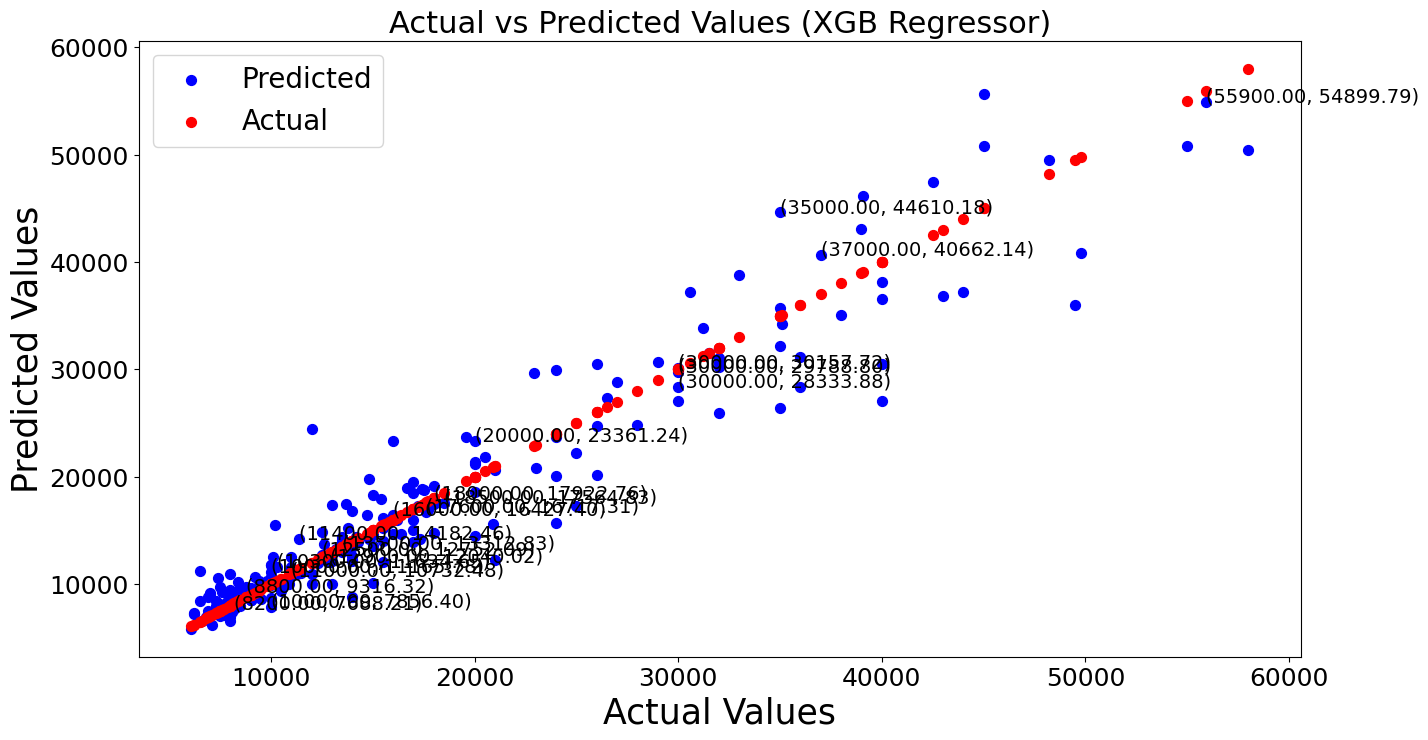

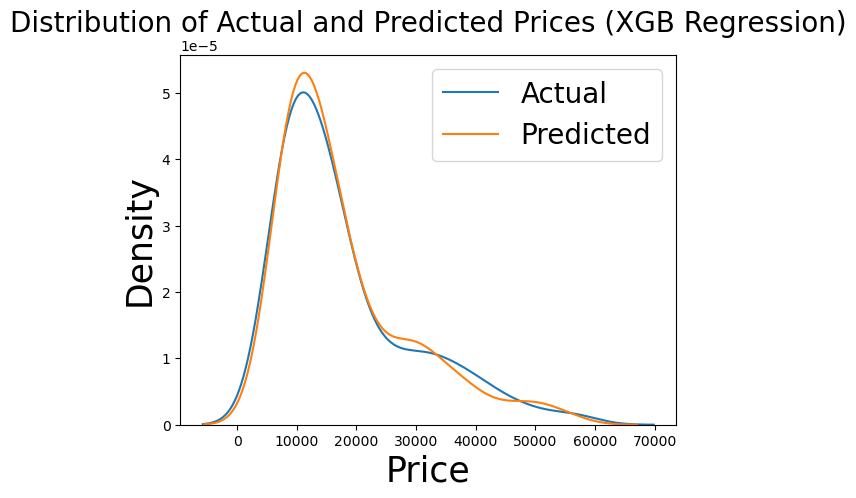

In [116]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

best_random_state = None
best_r2_score = -float('inf')
best_mae = float('inf')
best_rmse = float('inf')

for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    xgbr = xgb.XGBRegressor()
    xgbr.fit(X_train, y_train)

    y_pred = xgbr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    if r2 > best_r2_score:
        best_random_state = random_state
        best_r2_score = r2
        best_mae = mae
        best_rmse = rmse

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state)

xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

print("Best Random State:", best_random_state)
print("Best R2 Score:", best_r2_score)
print("Best Mean Absolute Error:", best_mae)
print("Best Root Mean Squared Error (RMSE):", best_rmse)

y_test_df = pd.DataFrame({'Actual Price': y_test.reset_index(drop=True), 'Predicted Price': y_pred})

# Scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(y_test.values, y_pred, color='blue', label='Predicted', s=50)
plt.scatter(y_test.values, y_test.values, color='red', label='Actual', s=50)

# Add coordinate values at every 10th point
for i in range(0, len(y_test.values), 10):
    plt.annotate(f'({y_test.values[i]:.2f}, {y_pred[i]:.2f})', (y_test.values[i], y_pred[i]), fontsize=14)

plt.xlabel('Actual Values', fontsize=25)
plt.ylabel('Predicted Values', fontsize=25)
plt.title('Actual vs Predicted Values (XGB Regressor)', fontsize=22)

# Add a legend
plt.legend(fontsize=20, loc='upper left')

# Set the font size of x and y axis labels
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Set the font size of coordinate points
plt.gcf().get_axes()[0].tick_params(labelsize=18)

# Show the plot
plt.show()

# KDE plot
sns.kdeplot(y_test.values, label='Actual')
sns.kdeplot(y_pred, label='Predicted')
plt.xlabel('Price', fontsize=25)
plt.ylabel('Density', fontsize=25)
plt.title('Distribution of Actual and Predicted Prices (XGB Regression)', fontsize=20)
plt.legend(fontsize=20)
plt.show()

# XGBoost Regression
xgbr_results = {'Model': 'XGBoost Regression',
                'R2 Score': best_r2_score,
                'MAE': best_mae,
                'RMSE': best_rmse}

# Save the XGBoost regression model
#with open('xgbr_model.pkl', 'wb') as file:
   # pickle.dump(xgbr, file)


Best Random State (Gradient Boosting): 72
Best R2 Score (Gradient Boosting): 0.9108879667120828
Best Mean Absolute Error (Gradient Boosting): 2118.4057837449723
Best Root Mean Squared Error (RMSE) (Gradient Boosting): 3417.3801696785044


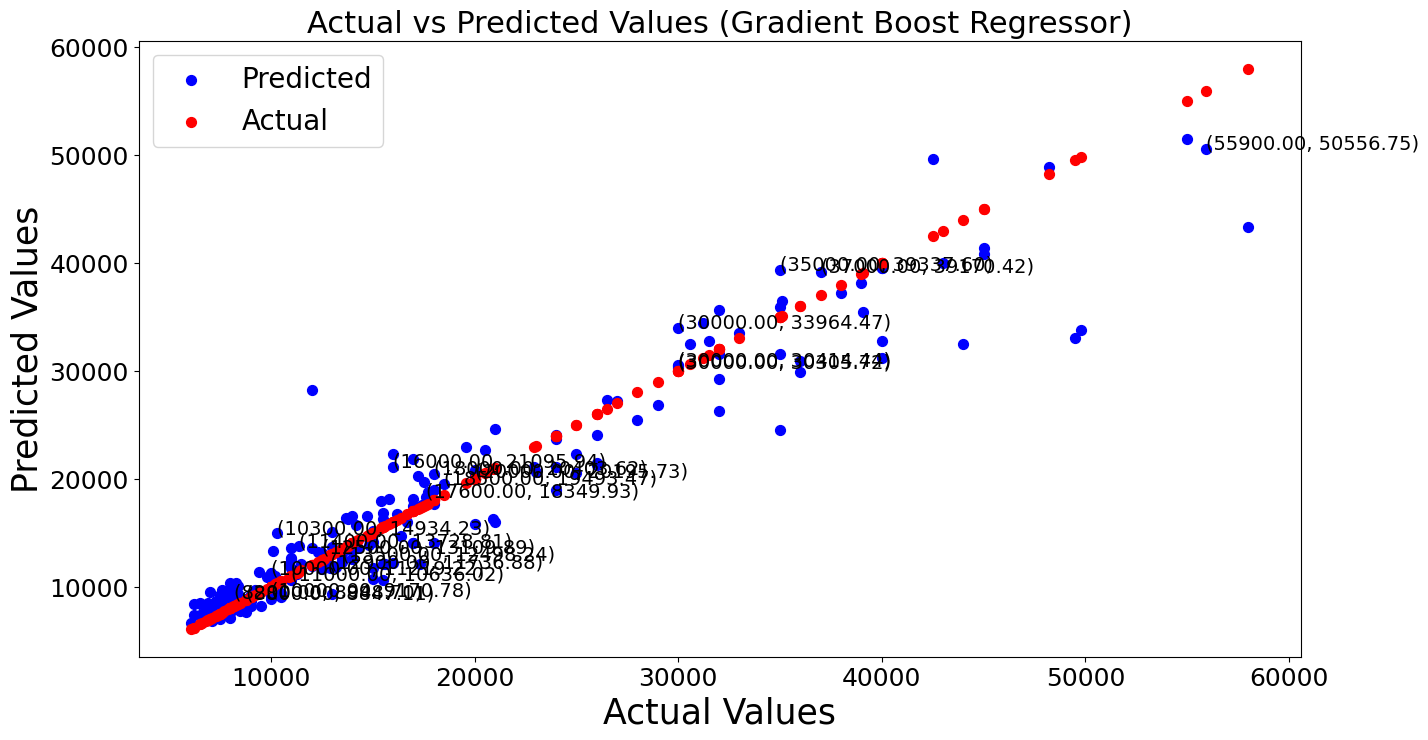

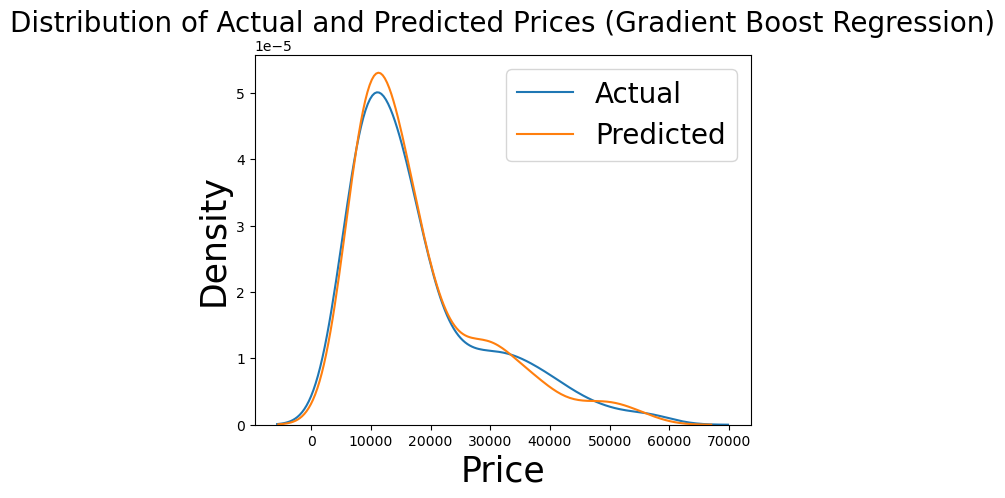

In [117]:
from sklearn.ensemble import GradientBoostingRegressor

best_random_state_gb = None
best_r2_score_gb = -float('inf')
best_mae_gb = float('inf')
best_rmse_gb = float('inf')

for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)

    y_pred_gb = gbr.predict(X_test)
    r2_gb = r2_score(y_test, y_pred_gb)
    mae_gb = mean_absolute_error(y_test, y_pred_gb)
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    rmse_gb = np.sqrt(mse_gb)

    if r2_gb > best_r2_score_gb:
        best_random_state_gb = random_state
        best_r2_score_gb = r2_gb
        best_mae_gb = mae_gb
        best_rmse_gb = rmse_gb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state_gb)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gb = gbr.predict(X_test)

print("Best Random State (Gradient Boosting):", best_random_state_gb)
print("Best R2 Score (Gradient Boosting):", best_r2_score_gb)
print("Best Mean Absolute Error (Gradient Boosting):", best_mae_gb)
print("Best Root Mean Squared Error (RMSE) (Gradient Boosting):", best_rmse_gb)

y_test_df_gb = pd.DataFrame({'Actual Price': y_test.reset_index(drop=True), 'Predicted Price': y_pred_gb})

# Scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(y_test.values, y_pred_gb, color='blue', label='Predicted', s=50)
plt.scatter(y_test.values, y_test.values, color='red', label='Actual', s=50)

# Add coordinate values at every 10th point
for i in range(0, len(y_test.values), 10):
    plt.annotate(f'({y_test.values[i]:.2f}, {y_pred_gb[i]:.2f})', (y_test.values[i], y_pred_gb[i]), fontsize=14)

# Add labels and title
plt.xlabel('Actual Values', fontsize=25)
plt.ylabel('Predicted Values', fontsize=25)
plt.title('Actual vs Predicted Values (Gradient Boost Regressor)', fontsize=22)

# Add a legend
plt.legend(fontsize=20, loc='upper left')

# Set the font size of x and y axis labels
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Set the font size of coordinate points
plt.gcf().get_axes()[0].tick_params(labelsize=18)

# Show the plot
plt.show()

# KDE plot
sns.kdeplot(y_test.values, label='Actual')
sns.kdeplot(y_pred, label='Predicted')
plt.xlabel('Price', fontsize=25)
plt.ylabel('Density', fontsize=25)
plt.title('Distribution of Actual and Predicted Prices (Gradient Boost Regression)', fontsize=20)
plt.legend(fontsize=20)
plt.show()

# Gradient Boosting Regression
gbr_results = {'Model': 'Gradient Boosting Regression',
               'R2 Score': best_r2_score_gb,
               'MAE': best_mae_gb,
               'RMSE': best_rmse_gb}

# Save the Gradient Boosting Regressor model
#with open('gbr_model.pkl', 'wb') as file:
  #  pickle.dump(gbr, file)


Best Random State (AdaBoost): 42
Best R2 Score (AdaBoost): 0.7532205683334381
Best Mean Absolute Error (AdaBoost): 5304.977043854503
Best Root Mean Squared Error (RMSE) (AdaBoost): 6090.870790097343


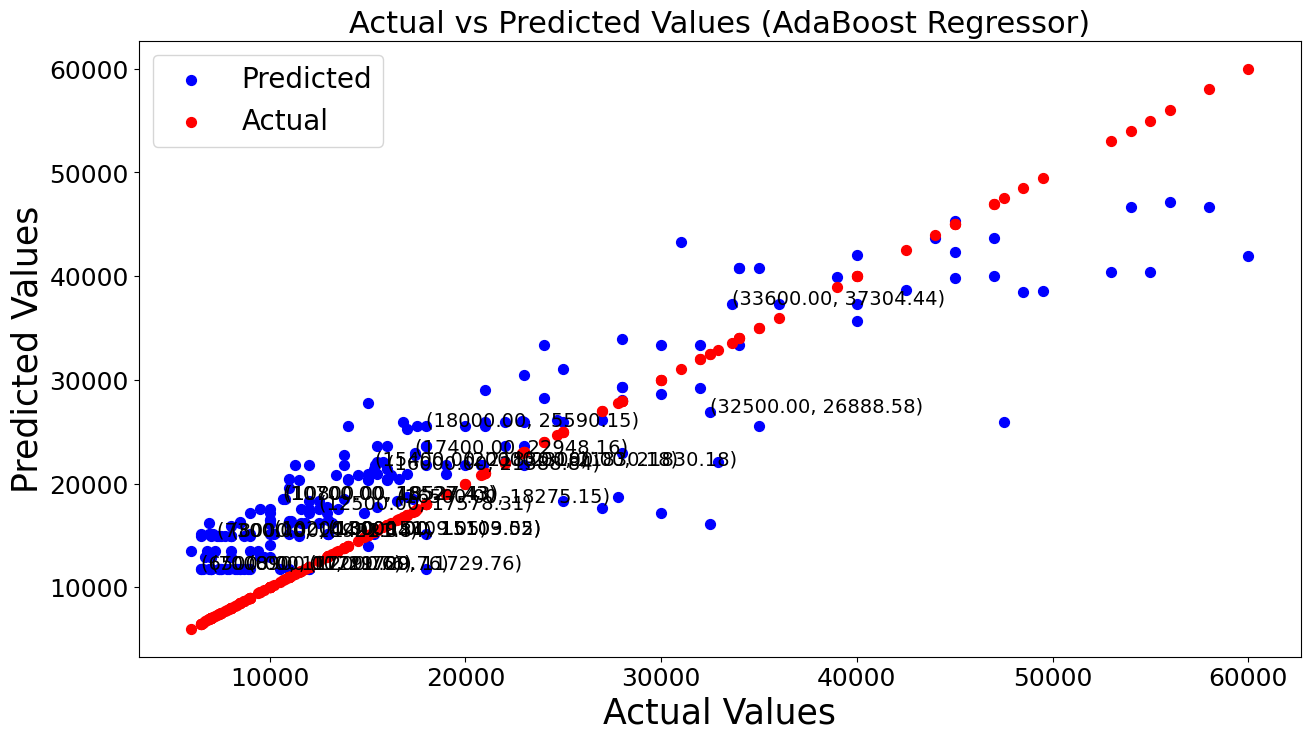

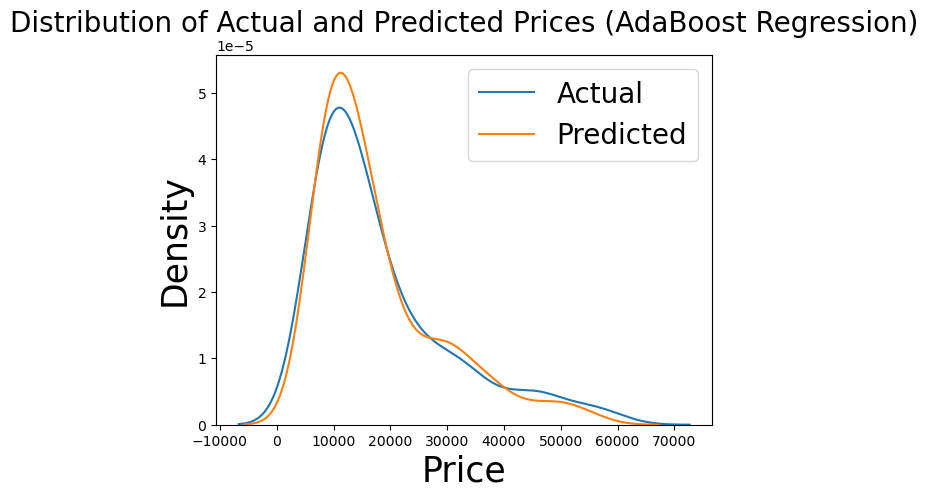

In [118]:
from sklearn.ensemble import AdaBoostRegressor

best_random_state_ab = None
best_r2_score_ab = -float('inf')
best_mae_ab = float('inf')
best_rmse_ab = float('inf')

for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    abr = AdaBoostRegressor()
    abr.fit(X_train, y_train)

    y_pred_ab = abr.predict(X_test)
    r2_ab = r2_score(y_test, y_pred_ab)
    mae_ab = mean_absolute_error(y_test, y_pred_ab)
    mse_ab = mean_squared_error(y_test, y_pred_ab)
    rmse_ab = np.sqrt(mse_ab)

    if r2_ab > best_r2_score_ab:
        best_random_state_ab = random_state
        best_r2_score_ab = r2_ab
        best_mae_ab = mae_ab
        best_rmse_ab = rmse_ab

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state_ab)

abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
y_pred_ab = abr.predict(X_test)

print("Best Random State (AdaBoost):", best_random_state_ab)
print("Best R2 Score (AdaBoost):", best_r2_score_ab)
print("Best Mean Absolute Error (AdaBoost):", best_mae_ab)
print("Best Root Mean Squared Error (RMSE) (AdaBoost):", best_rmse_ab)

y_test_df_ab = pd.DataFrame({'Actual Price': y_test.reset_index(drop=True), 'Predicted Price': y_pred_ab})

# Scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(y_test.values, y_pred_ab, color='blue', label='Predicted', s=50)
plt.scatter(y_test.values, y_test.values, color='red', label='Actual', s=50)

# Add coordinate values at every 10th point
for i in range(0, len(y_test.values), 10):
    plt.annotate(f'({y_test.values[i]:.2f}, {y_pred_ab[i]:.2f})', (y_test.values[i], y_pred_ab[i]), fontsize=14)

# Add labels and title
plt.xlabel('Actual Values', fontsize=25)
plt.ylabel('Predicted Values', fontsize=25)
plt.title('Actual vs Predicted Values (AdaBoost Regressor)', fontsize=22)

# Add a legend
plt.legend(fontsize=20, loc='upper left')

# Set the font size of x and y axis labels
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Set the font size of coordinate points
plt.gcf().get_axes()[0].tick_params(labelsize=18)

# Show the plot
plt.show()

# KDE plot
sns.kdeplot(y_test.values, label='Actual')
sns.kdeplot(y_pred, label='Predicted')
plt.xlabel('Price', fontsize=25)
plt.ylabel('Density', fontsize=25)
plt.title('Distribution of Actual and Predicted Prices (AdaBoost Regression)', fontsize=20)
plt.legend(fontsize=20)
plt.show()

# AdaBoost Regression
abr_results = {'Model': 'AdaBoost Regression',
               'R2 Score': best_r2_score_ab,
               'MAE': best_mae_ab,
               'RMSE': best_rmse_ab}

# Save the AdaBoost Regressor model
#with open('abr_model.pkl', 'wb') as file:
   # pickle.dump(abr, file)


Best Random State (Linear Regression): 41
Best R2 Score (Linear Regression): 0.8462834403384734
Best Mean Absolute Error (Linear Regression): 3128.212566281306
Best Root Mean Squared Error (RMSE) (Linear Regression): 4379.647293816659


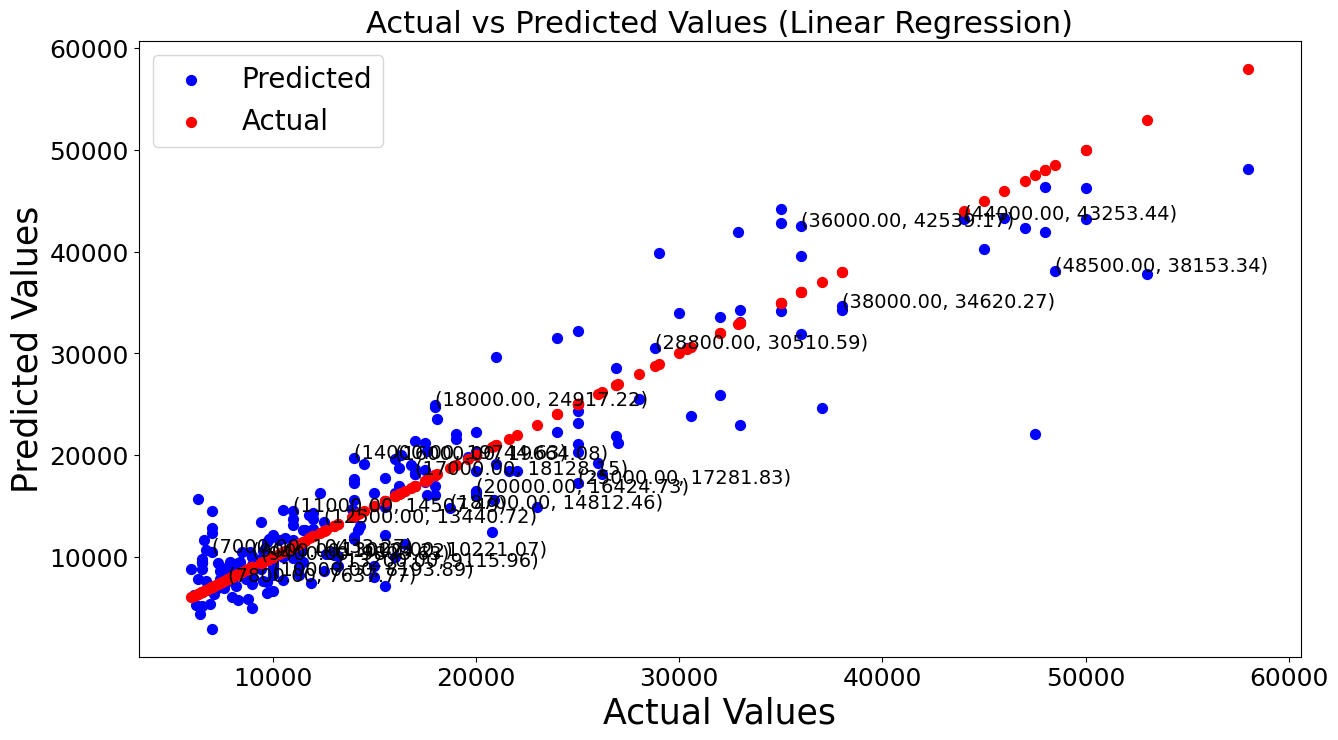

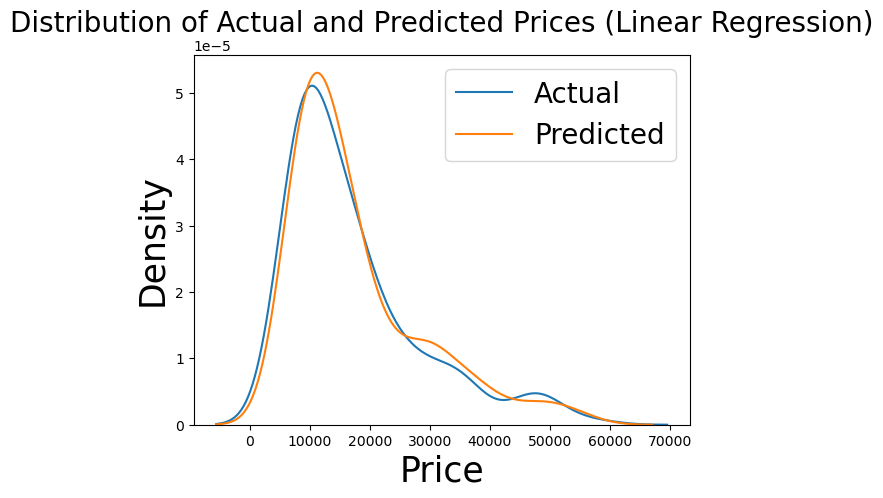

In [119]:
from sklearn.linear_model import LinearRegression

best_random_state_lr = None
best_r2_score_lr = -float('inf')
best_mae_lr = float('inf')
best_rmse_lr = float('inf')

for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred_lr = lr.predict(X_test)
    r2_lr = r2_score(y_test, y_pred_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    rmse_lr = np.sqrt(mse_lr)

    if r2_lr > best_r2_score_lr:
        best_random_state_lr = random_state
        best_r2_score_lr = r2_lr
        best_mae_lr = mae_lr
        best_rmse_lr = rmse_lr

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state_lr)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Best Random State (Linear Regression):", best_random_state_lr)
print("Best R2 Score (Linear Regression):", best_r2_score_lr)
print("Best Mean Absolute Error (Linear Regression):", best_mae_lr)
print("Best Root Mean Squared Error (RMSE) (Linear Regression):", best_rmse_lr)

y_test_df_lr = pd.DataFrame({'Actual Price': y_test.reset_index(drop=True), 'Predicted Price': y_pred_lr})

# Scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(y_test.values, y_pred_lr, color='blue', label='Predicted', s=50)
plt.scatter(y_test.values, y_test.values, color='red', label='Actual', s=50)

# Add coordinate values at every 10th point
for i in range(0, len(y_test.values), 10):
    plt.annotate(f'({y_test.values[i]:.2f}, {y_pred_lr[i]:.2f})', (y_test.values[i], y_pred_lr[i]), fontsize=14)

# Add labels and title
plt.xlabel('Actual Values', fontsize=25)
plt.ylabel('Predicted Values', fontsize=25)
plt.title('Actual vs Predicted Values (Linear Regression)', fontsize=22)

# Add a legend
plt.legend(fontsize=20, loc='upper left')

# Set the font size of x and y axis labels
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Set the font size of coordinate points
plt.gcf().get_axes()[0].tick_params(labelsize=18)

# Show the plot
plt.show()

# KDE plot
sns.kdeplot(y_test.values, label='Actual')
sns.kdeplot(y_pred, label='Predicted')
plt.xlabel('Price', fontsize=25)
plt.ylabel('Density', fontsize=25)
plt.title('Distribution of Actual and Predicted Prices (Linear Regression)', fontsize=20)
plt.legend(fontsize=20)
plt.show()

# Linear Regression
lr_results = {'Model': 'Linear Regression',
              'R2 Score': best_r2_score_lr,
              'MAE': best_mae_lr,
              'RMSE': best_rmse_lr}

# Save the Linear Regression model
#with open('lr_model.pkl', 'wb') as file:
   # pickle.dump(lr, file)


Best Random State (Random Forest): 72
Best R2 Score (Random Forest): 0.9251872237219012
Best Mean Absolute Error (Random Forest): 2155.7067593864467
Best Root Mean Squared Error (RMSE) (Random Forest): 3131.215831960786


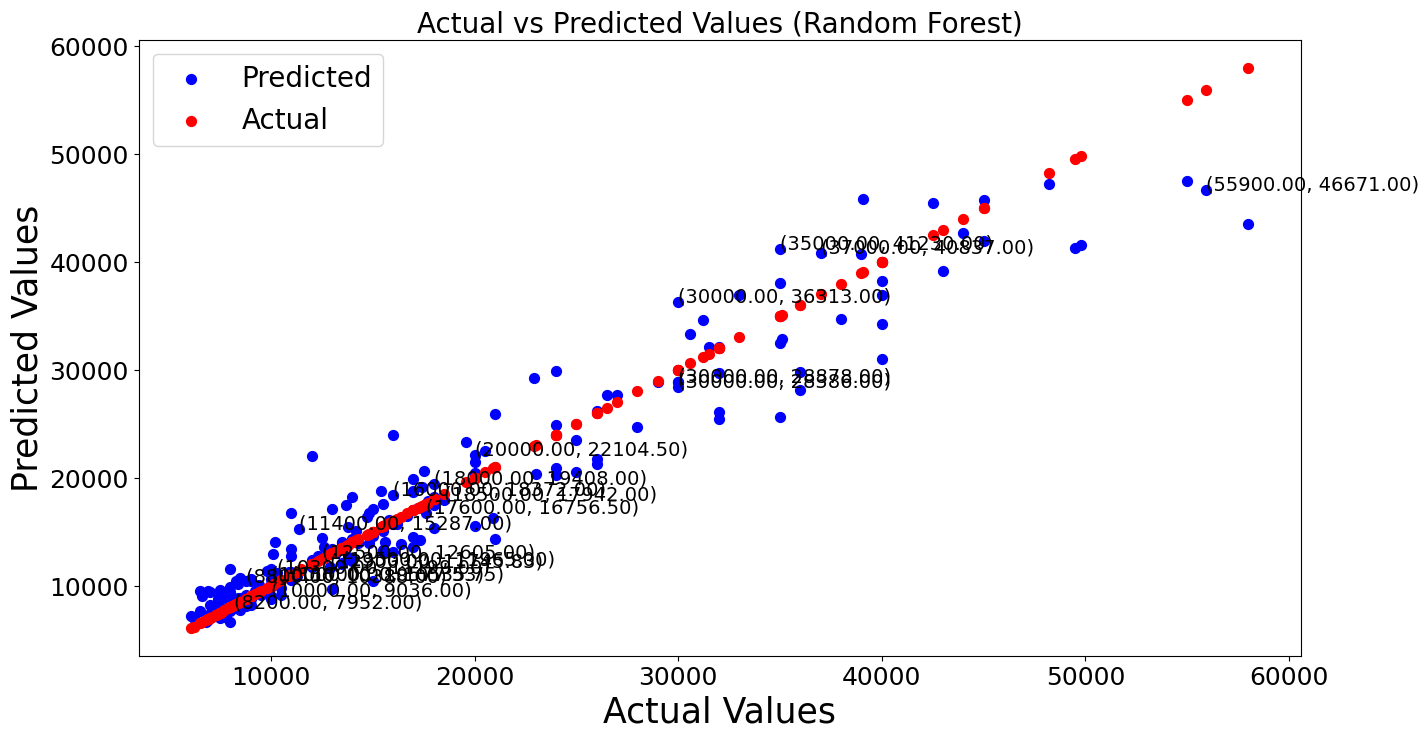

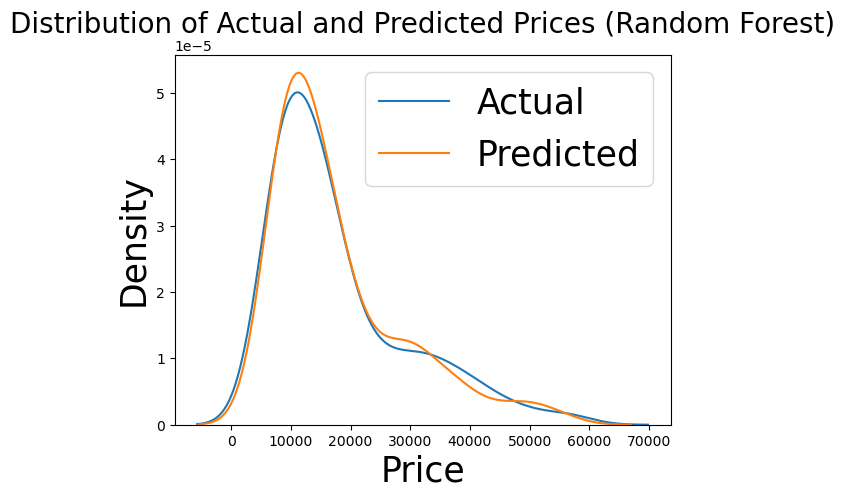

In [120]:
from sklearn.ensemble import RandomForestRegressor

best_random_state_rf = None
best_r2_score_rf = -float('inf')
best_mae_rf = float('inf')
best_rmse_rf = float('inf')

for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_test)
    r2_rf = r2_score(y_test, y_pred_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)

    if r2_rf > best_r2_score_rf:
        best_random_state_rf = random_state
        best_r2_score_rf = r2_rf
        best_mae_rf = mae_rf
        best_rmse_rf = rmse_rf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state_rf)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Best Random State (Random Forest):", best_random_state_rf)
print("Best R2 Score (Random Forest):", best_r2_score_rf)
print("Best Mean Absolute Error (Random Forest):", best_mae_rf)
print("Best Root Mean Squared Error (RMSE) (Random Forest):", best_rmse_rf)

y_test_df_rf = pd.DataFrame({'Actual Price': y_test.reset_index(drop=True), 'Predicted Price': y_pred_rf})

# Scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(y_test.values, y_pred_rf, color='blue', label='Predicted', s=50)
plt.scatter(y_test.values, y_test.values, color='red', label='Actual', s=50)

# Add coordinate values at every 10th point
for i in range(0, len(y_test.values), 10):
    plt.annotate(f'({y_test.values[i]:.2f}, {y_pred_rf[i]:.2f})', (y_test.values[i], y_pred_rf[i]), fontsize=14)

# Add labels and title
plt.xlabel('Actual Values', fontsize=25)
plt.ylabel('Predicted Values', fontsize=25)
plt.title('Actual vs Predicted Values (Random Forest)', fontsize=20)

# Add a legend
plt.legend(fontsize=20, loc='upper left')

# Set the font size of x and y axis labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set the font size of coordinate points
plt.gcf().get_axes()[0].tick_params(labelsize=18)

# Show the plot
plt.show()

# KDE plot
sns.kdeplot(y_test.values, label='Actual')
sns.kdeplot(y_pred, label='Predicted')
plt.xlabel('Price', fontsize=25)
plt.ylabel('Density', fontsize=25)
plt.title('Distribution of Actual and Predicted Prices (Random Forest)', fontsize=20)
plt.legend(fontsize=25)
plt.show()

# Random Forest Regression
rf_results = {'Model': 'Random Forest Regression',
              'R2 Score': best_r2_score_rf,
              'MAE': best_mae_rf,
              'RMSE': best_rmse_rf}

# Save the Random Forest Regression model
#with open('rf_model.pkl', 'wb') as file:
   # pickle.dump(rf, file)
